In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate

In [2]:
p000 = np.loadtxt('UFR3-30_C_10595_data_MB-001.dat') # x/h = 0.05
#p001 = np.loadtxt('UFR3-30_C_10595_data_MB-002.dat') # x/h = 0.5
p001 = np.loadtxt('UFR3-30_C_10595_data_MB-003.dat') # x/h = 1
p002 = np.loadtxt('UFR3-30_C_10595_data_MB-004.dat') # x/h = 2
p003 = np.loadtxt('UFR3-30_C_10595_data_MB-005.dat') # x/h = 3
p004 = np.loadtxt('UFR3-30_C_10595_data_MB-006.dat') # x/h = 4
p005 = np.loadtxt('UFR3-30_C_10595_data_MB-007.dat') # x/h = 5
p006 = np.loadtxt('UFR3-30_C_10595_data_MB-008.dat') # x/h = 6
p007 = np.loadtxt('UFR3-30_C_10595_data_MB-009.dat') # x/h = 7
p008 = np.loadtxt('UFR3-30_C_10595_data_MB-010.dat') # x/h = 8
# [x/h, Cf]
hillOF = np.loadtxt('../hill.txt')
BottomWallPoints = pd.read_csv('../BottomWallPoints.csv')
newBottomWallPoints = pd.read_csv('../newBottomWallPoints.csv')
Cf_Ref = np.loadtxt('../hill_LES_cf_digitized.dat', skiprows=5)

In [3]:
Ref = [p000,p001,p002,p003,p004,p005,p006,p007,p008]

In [4]:
OFp000 = pd.read_csv('OFpoints/X0H_U.csv')
OFp001 = pd.read_csv('OFpoints/X1H_U.csv')
OFp002 = pd.read_csv('OFpoints/X2H_U.csv')
OFp003 = pd.read_csv('OFpoints/X3H_U.csv')
OFp004 = pd.read_csv('OFpoints/X4H_U.csv')
OFp005 = pd.read_csv('OFpoints/X5H_U.csv')
OFp006 = pd.read_csv('OFpoints/X6H_U.csv')
OFp007 = pd.read_csv('OFpoints/X7H_U.csv')
OFp008 = pd.read_csv('OFpoints/X8H_U.csv')

In [5]:
OF = [OFp000,OFp001,OFp002,OFp003,OFp004,OFp005,OFp006,OFp007,OFp008]

#### Note that the points order of Ref and OF is different but it doesn't really matter because after interpolation the order is the same

0
(467,)
(161,)


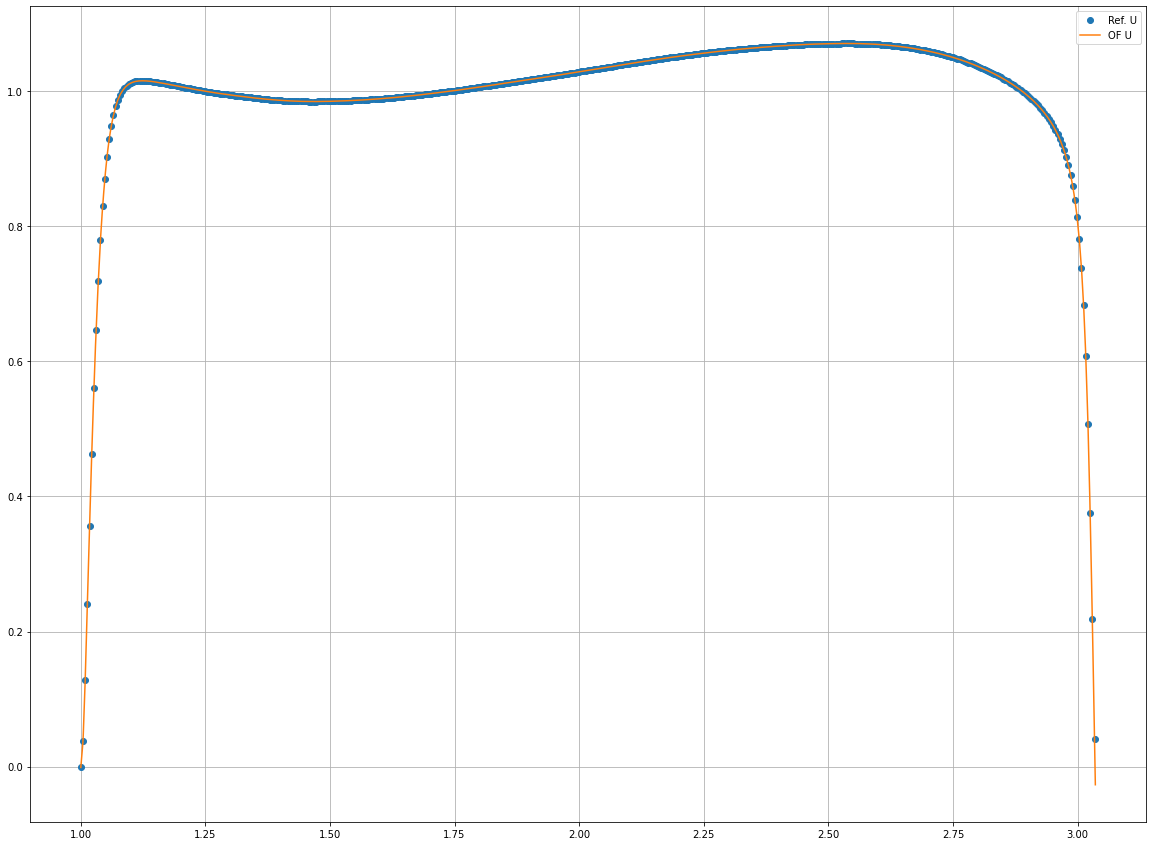

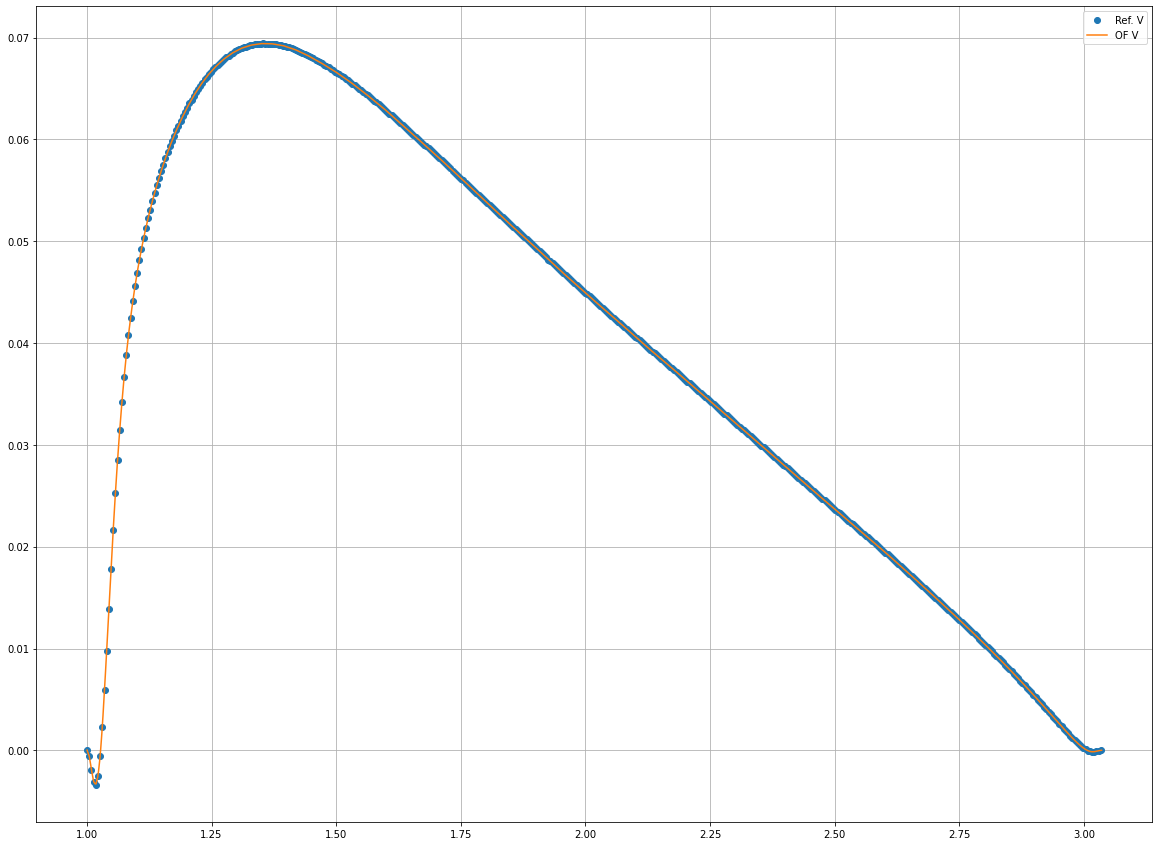

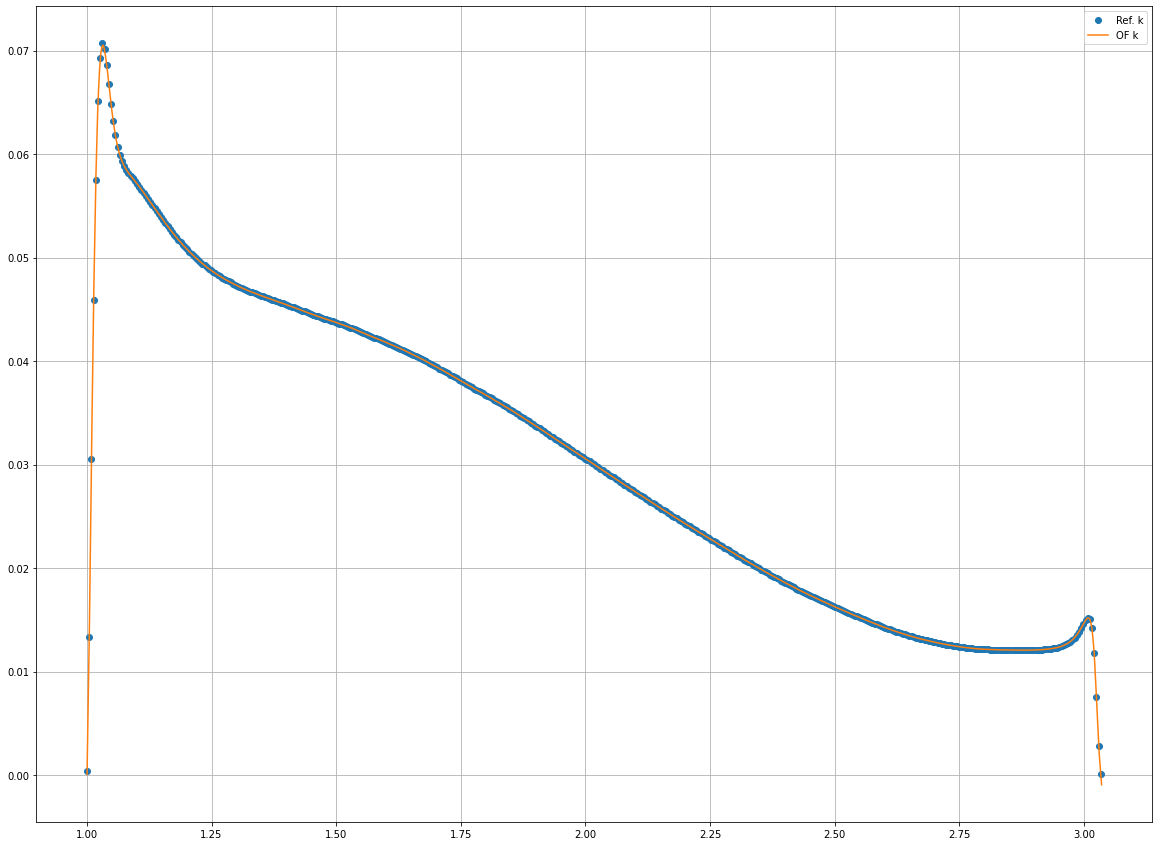

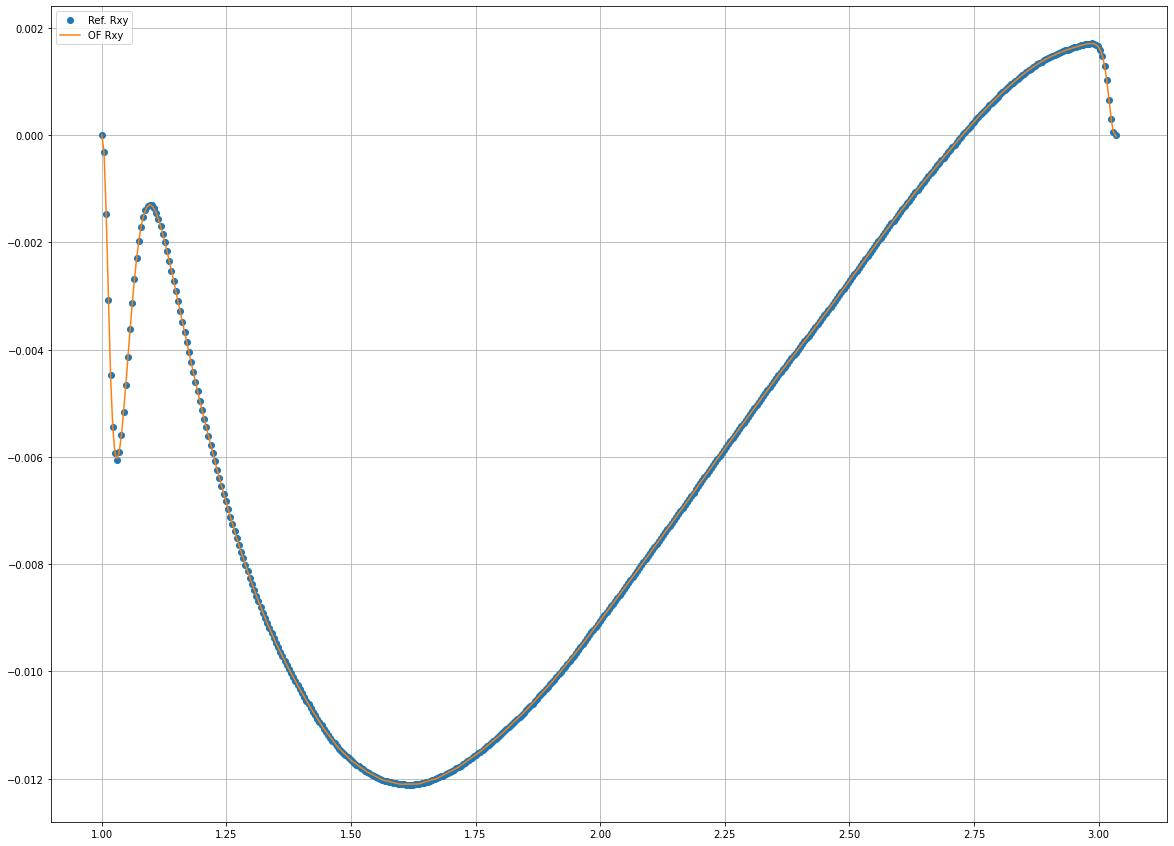

1
(482,)
(163,)


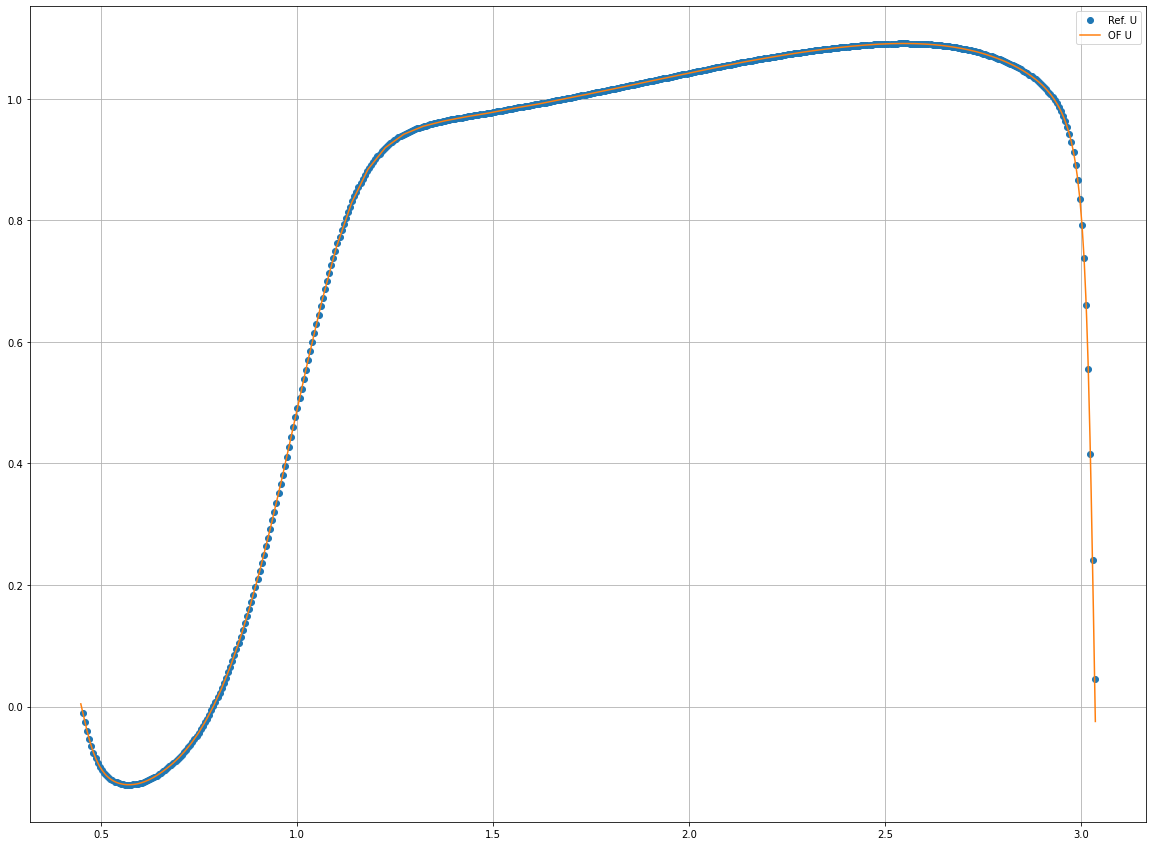

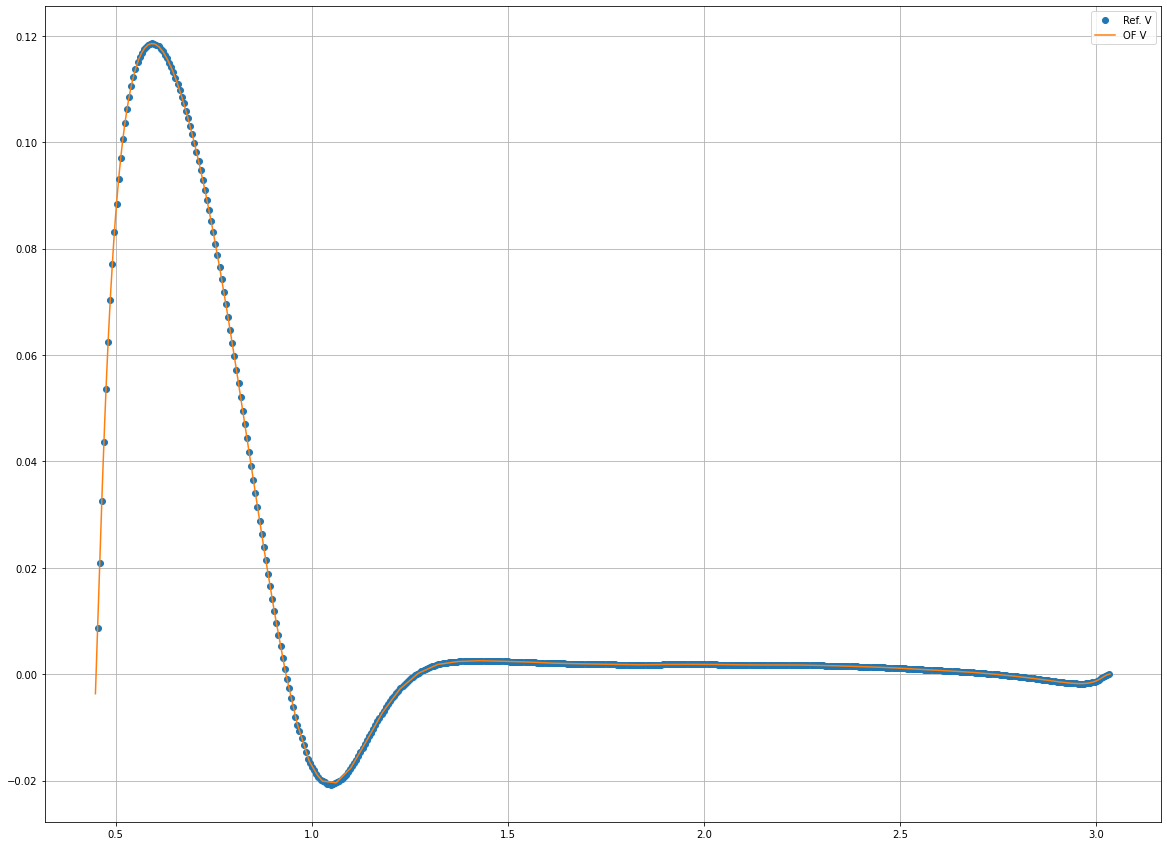

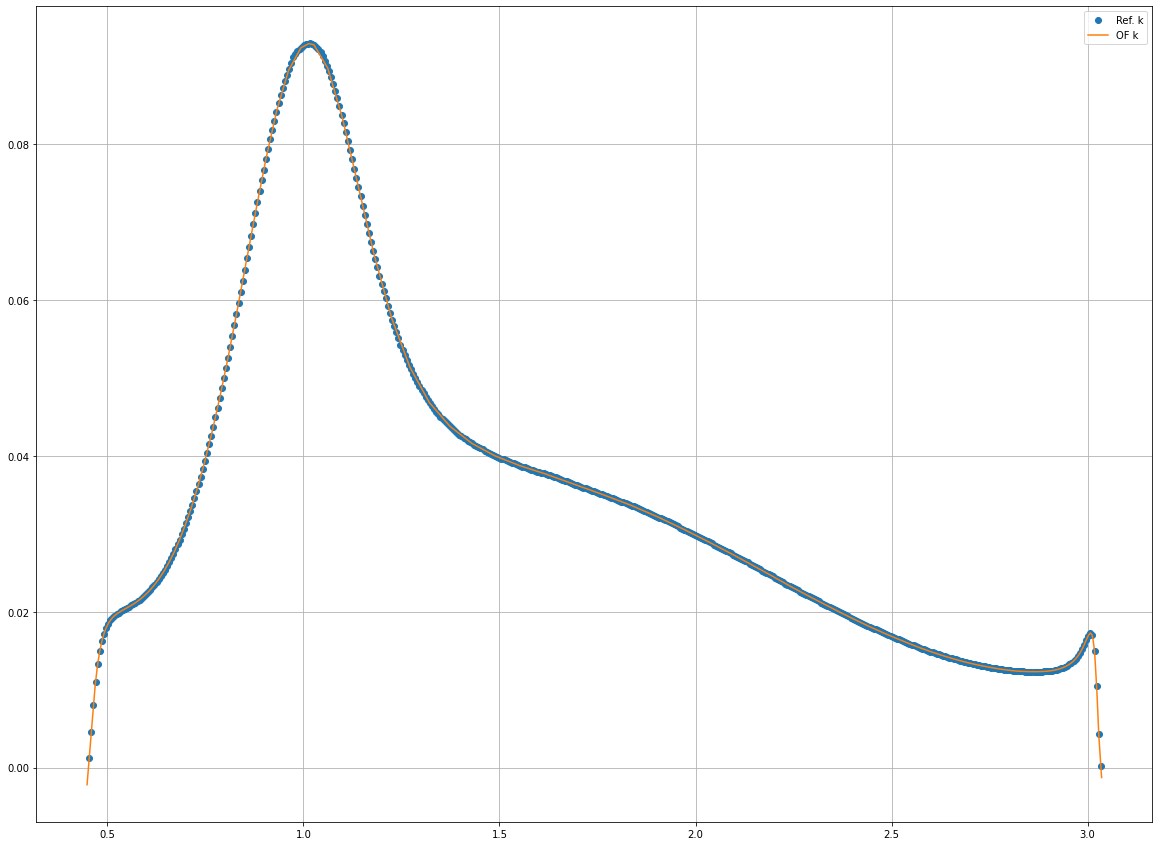

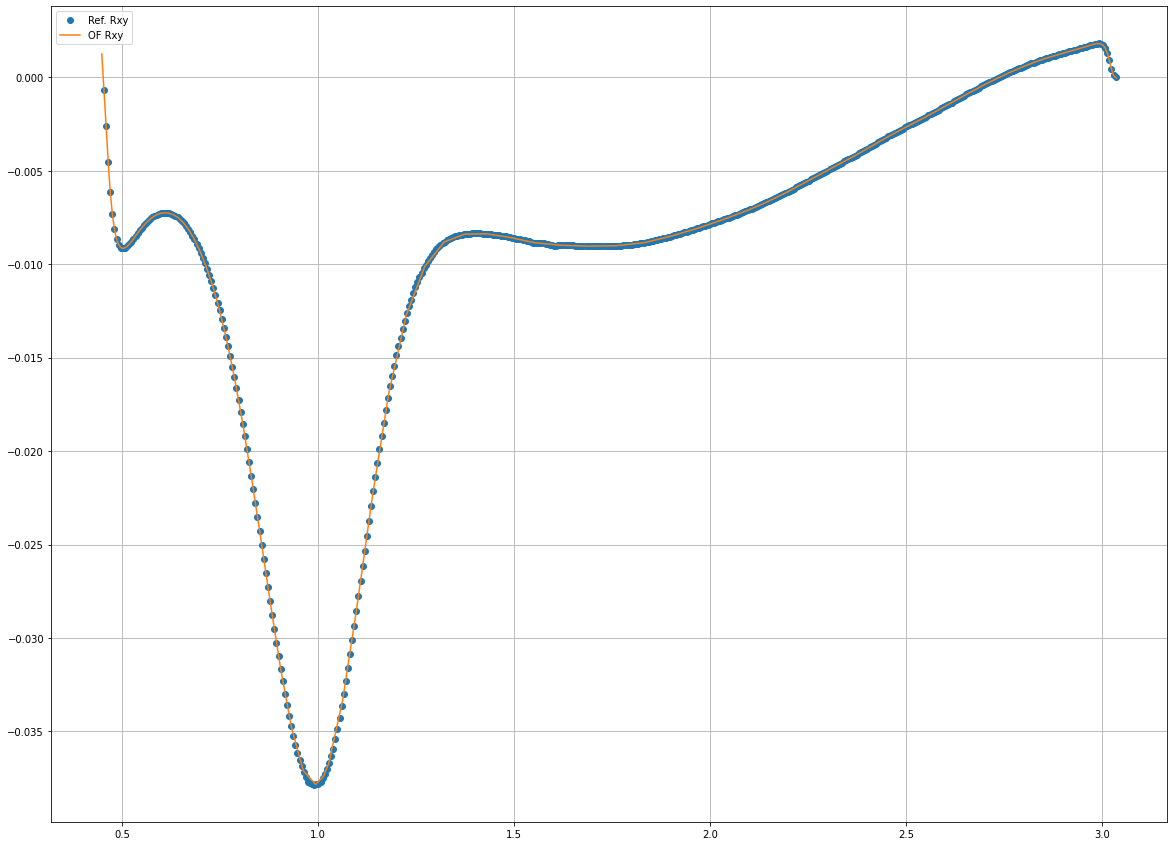

2
(491,)
(164,)


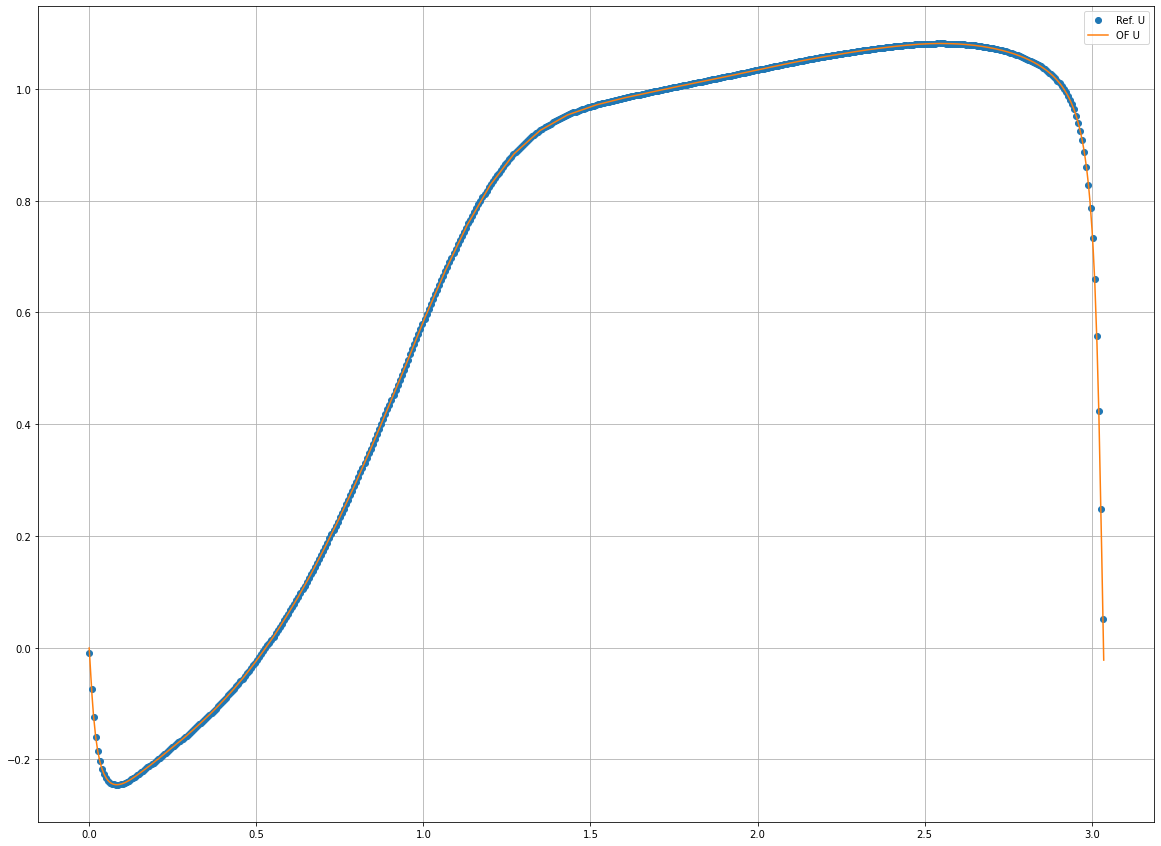

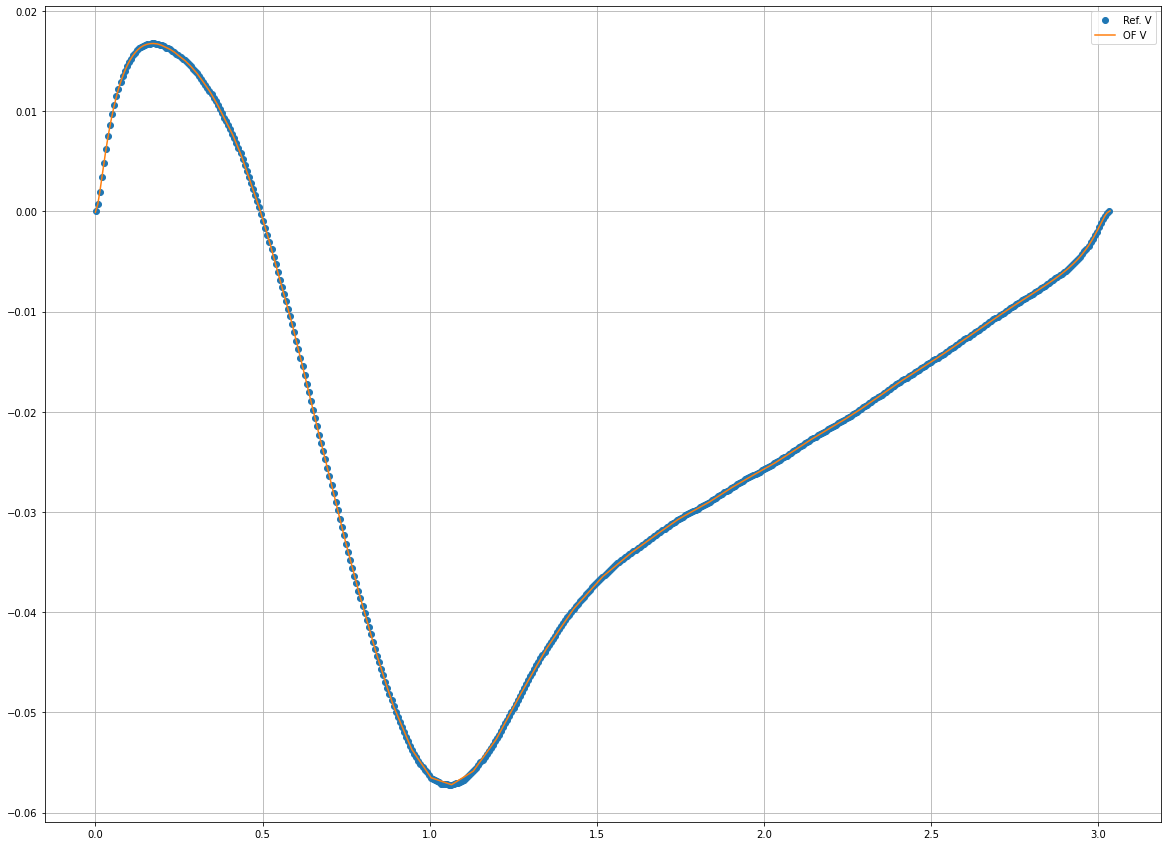

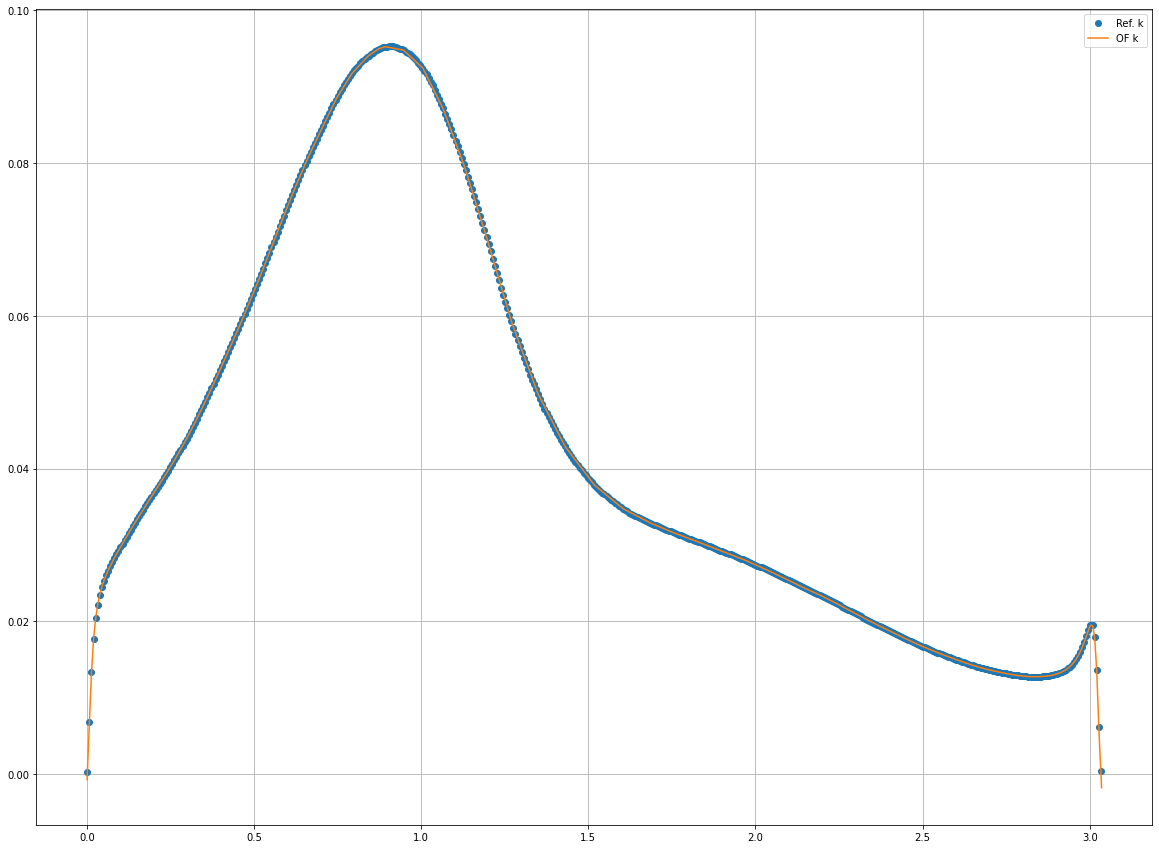

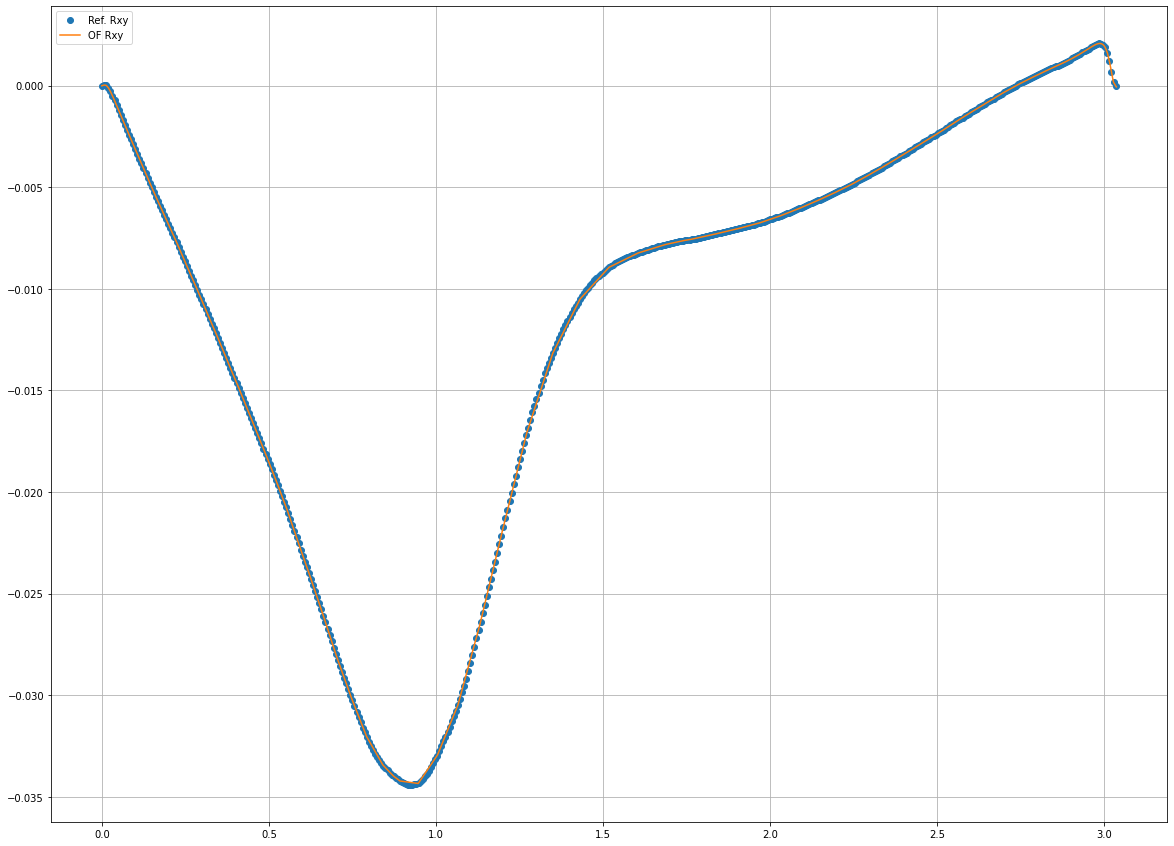

3
(491,)
(163,)


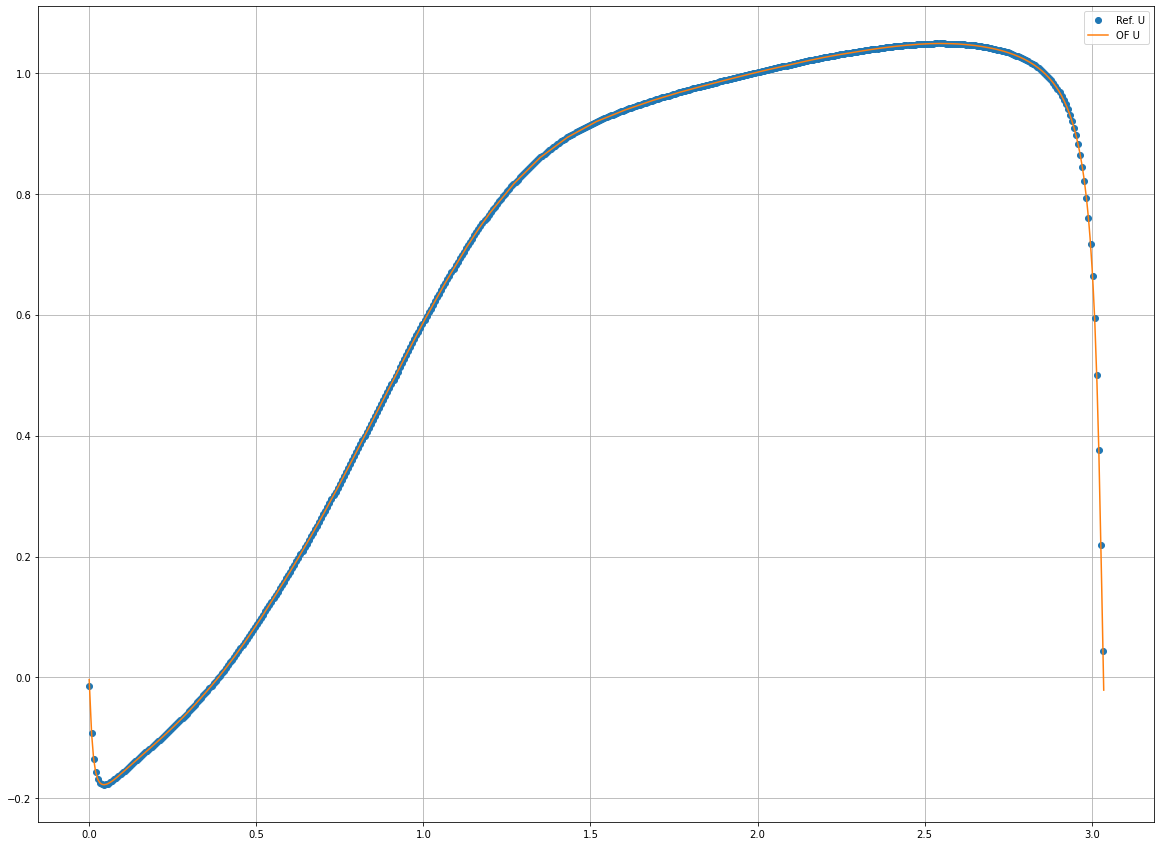

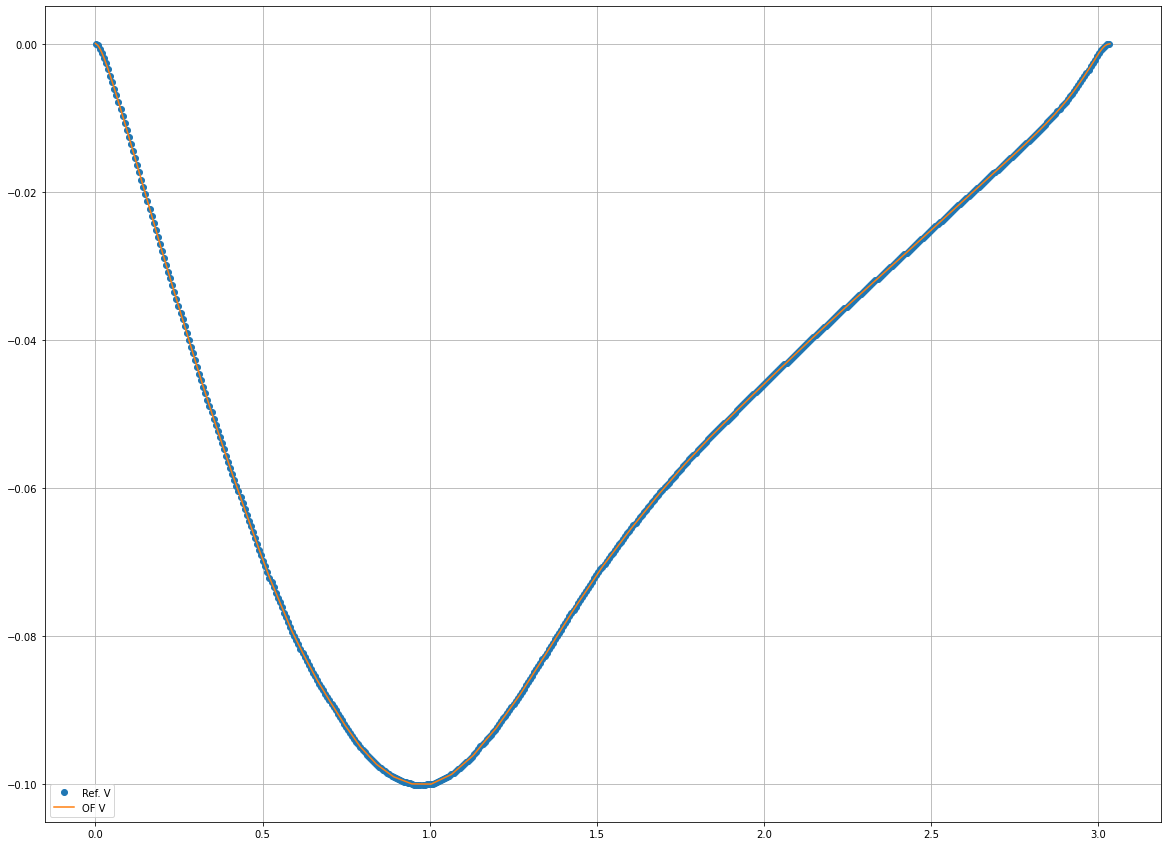

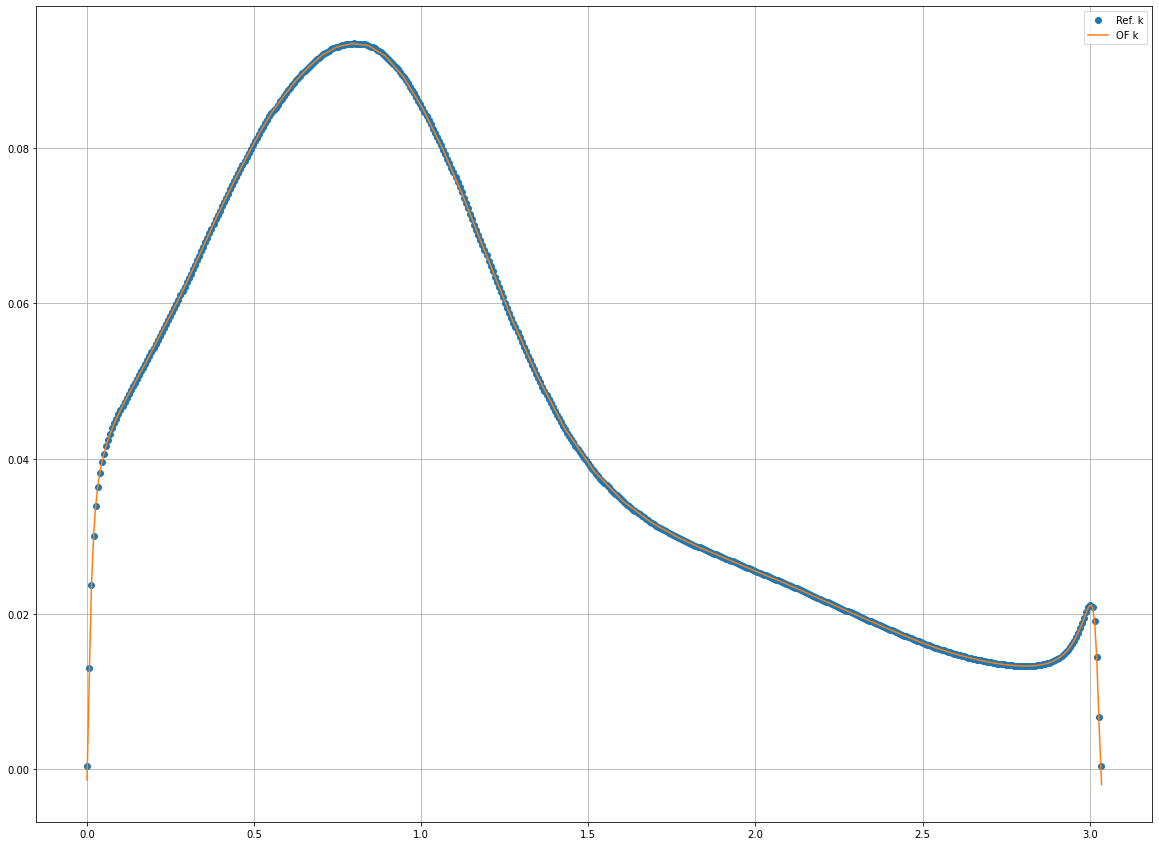

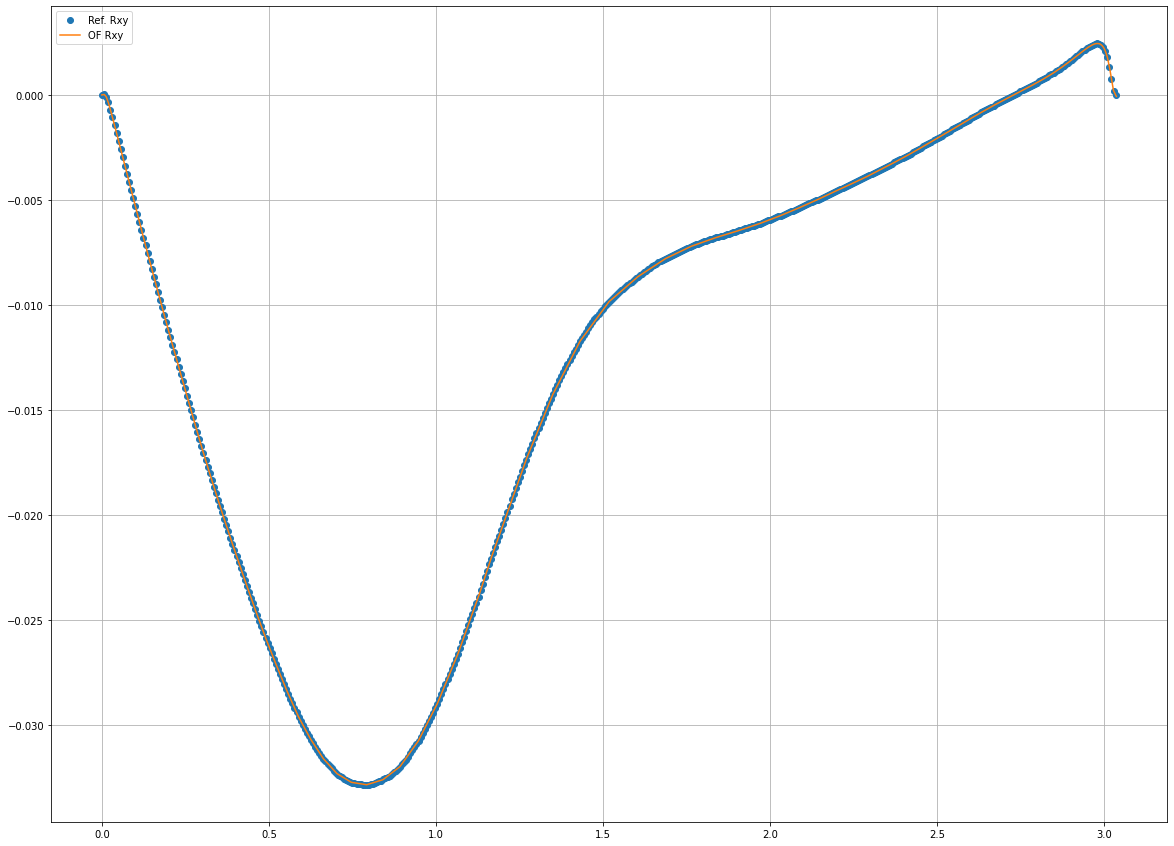

4
(491,)
(162,)


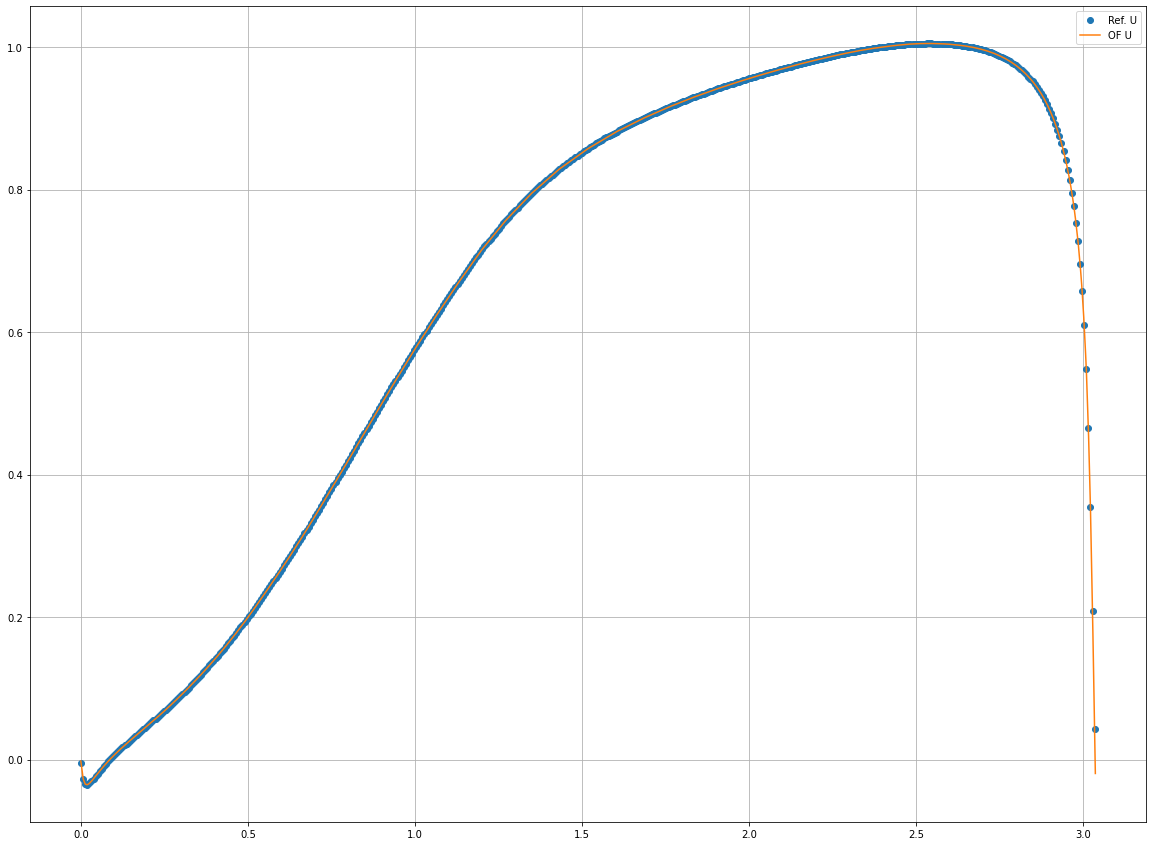

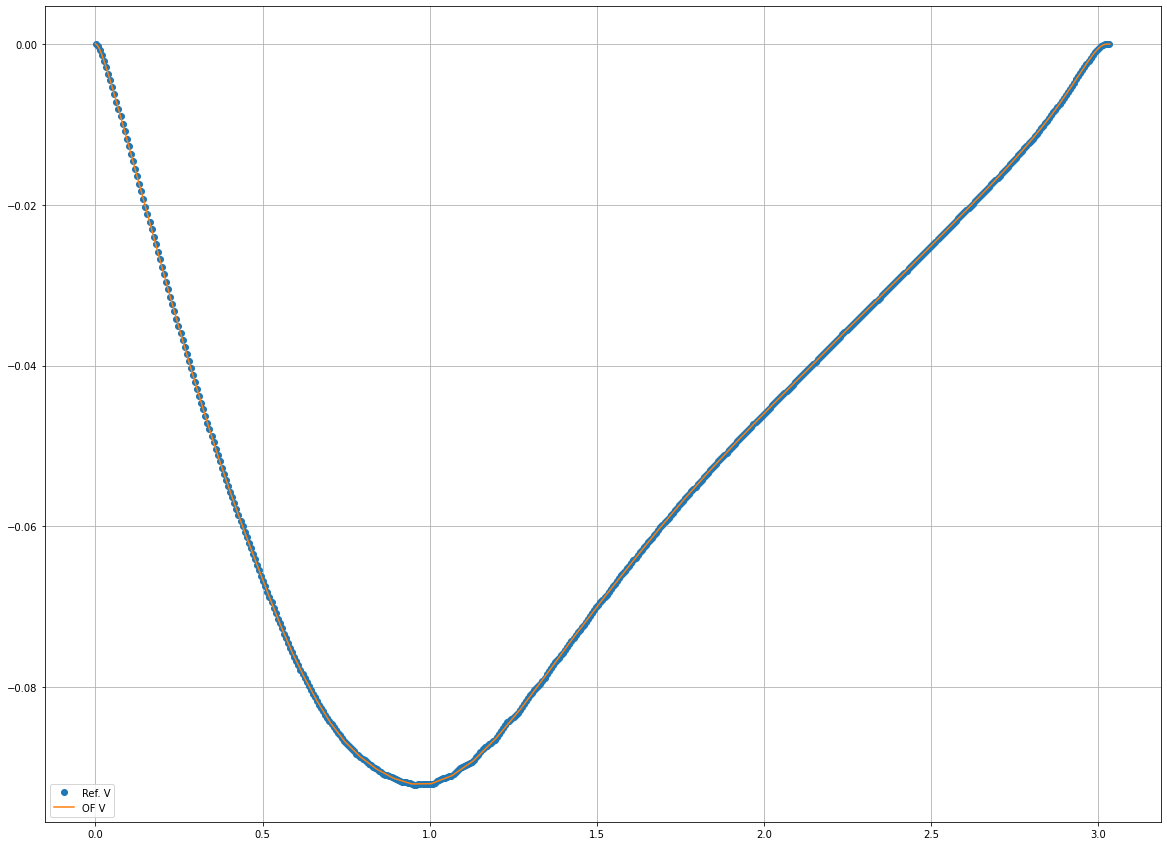

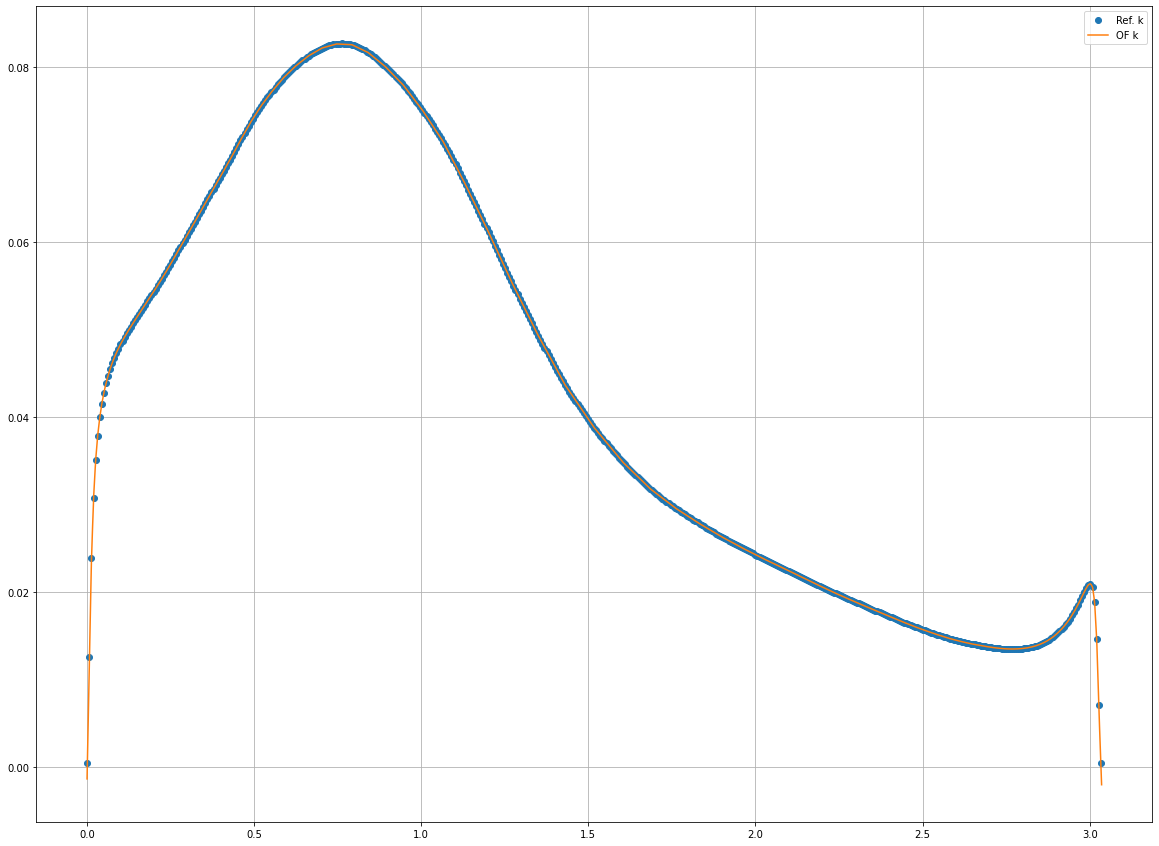

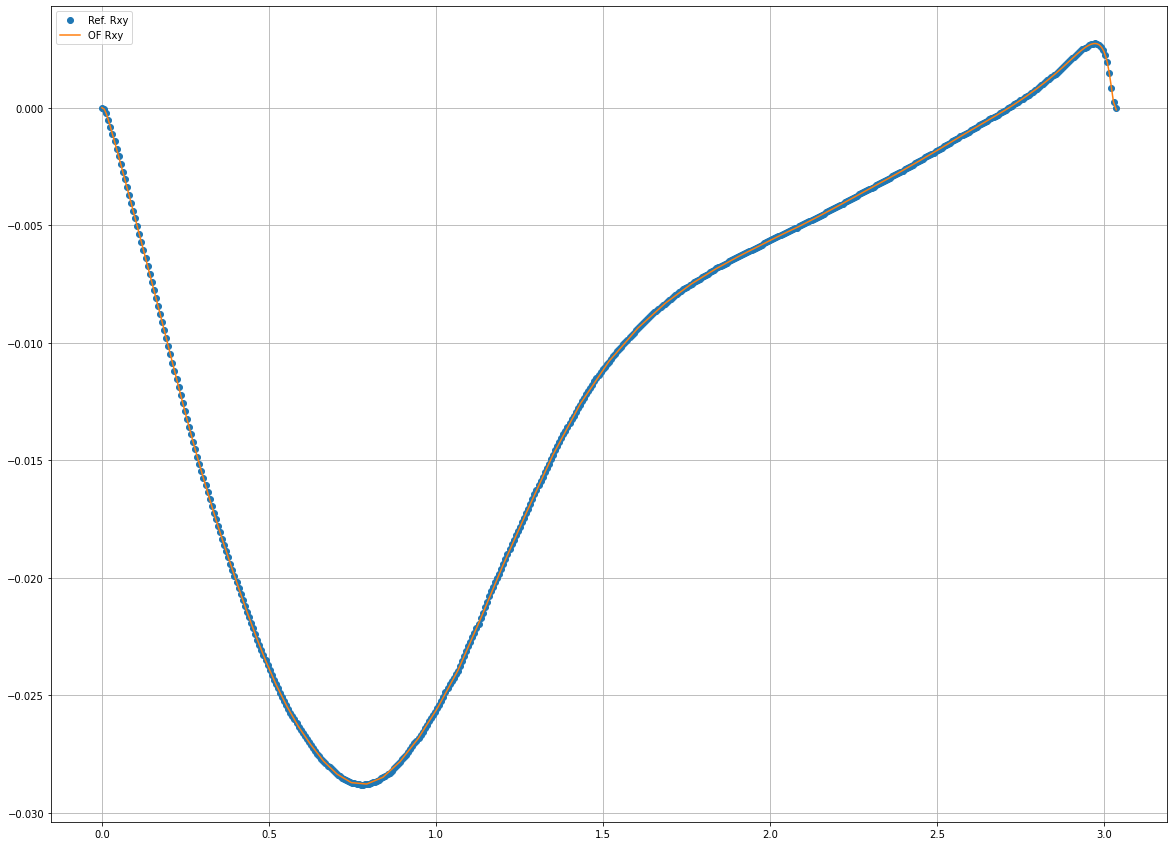

5
(491,)
(162,)


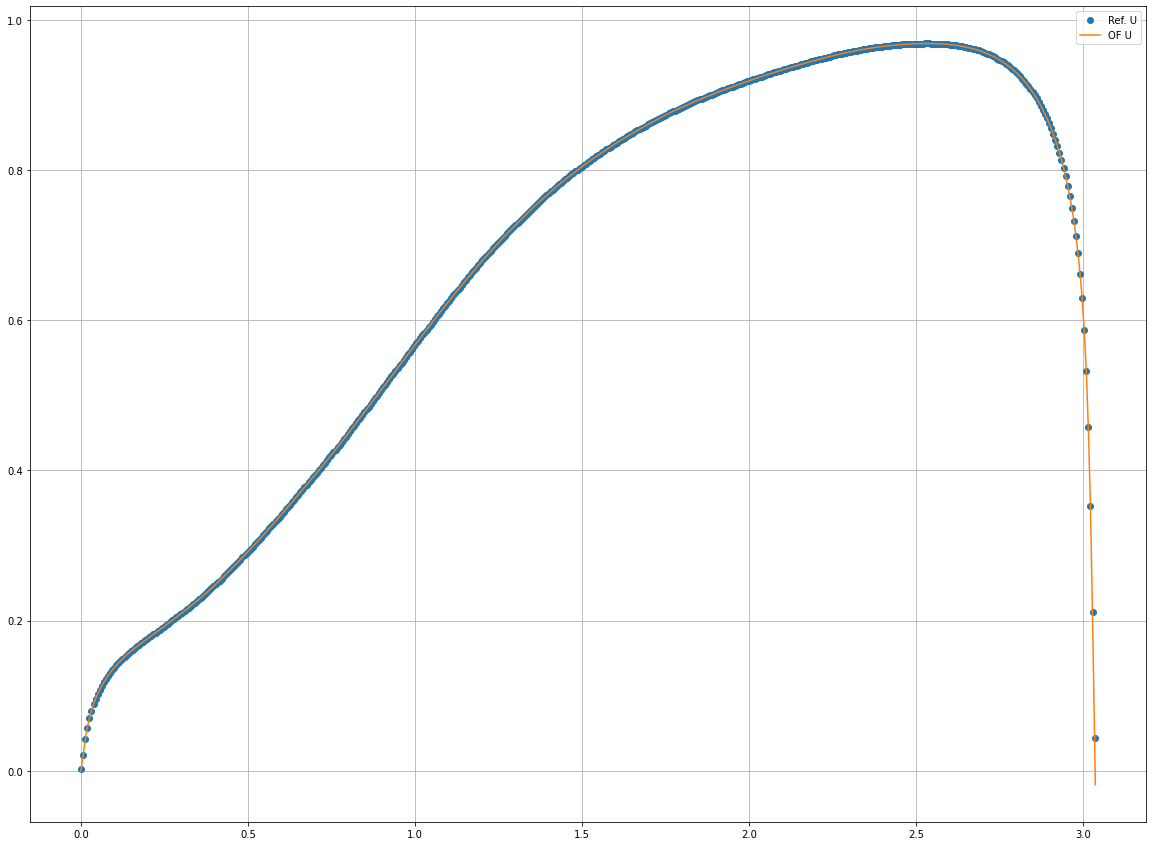

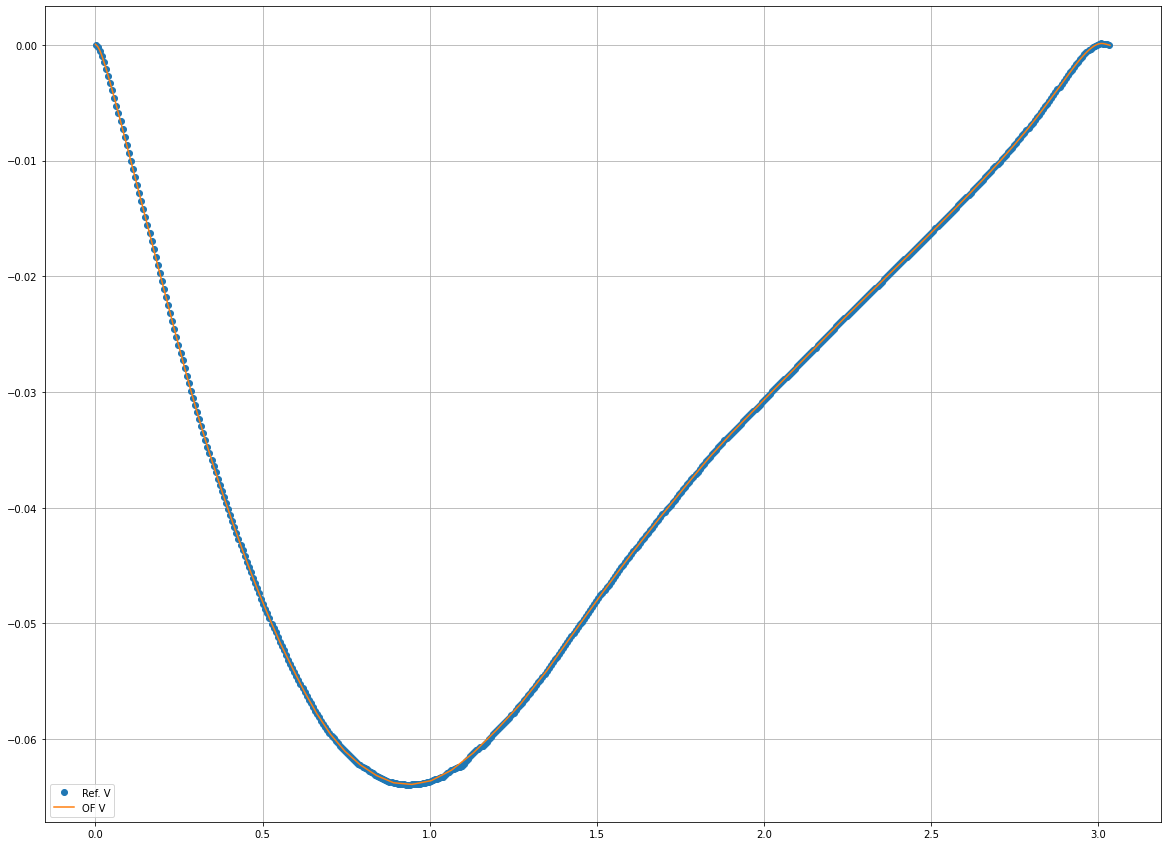

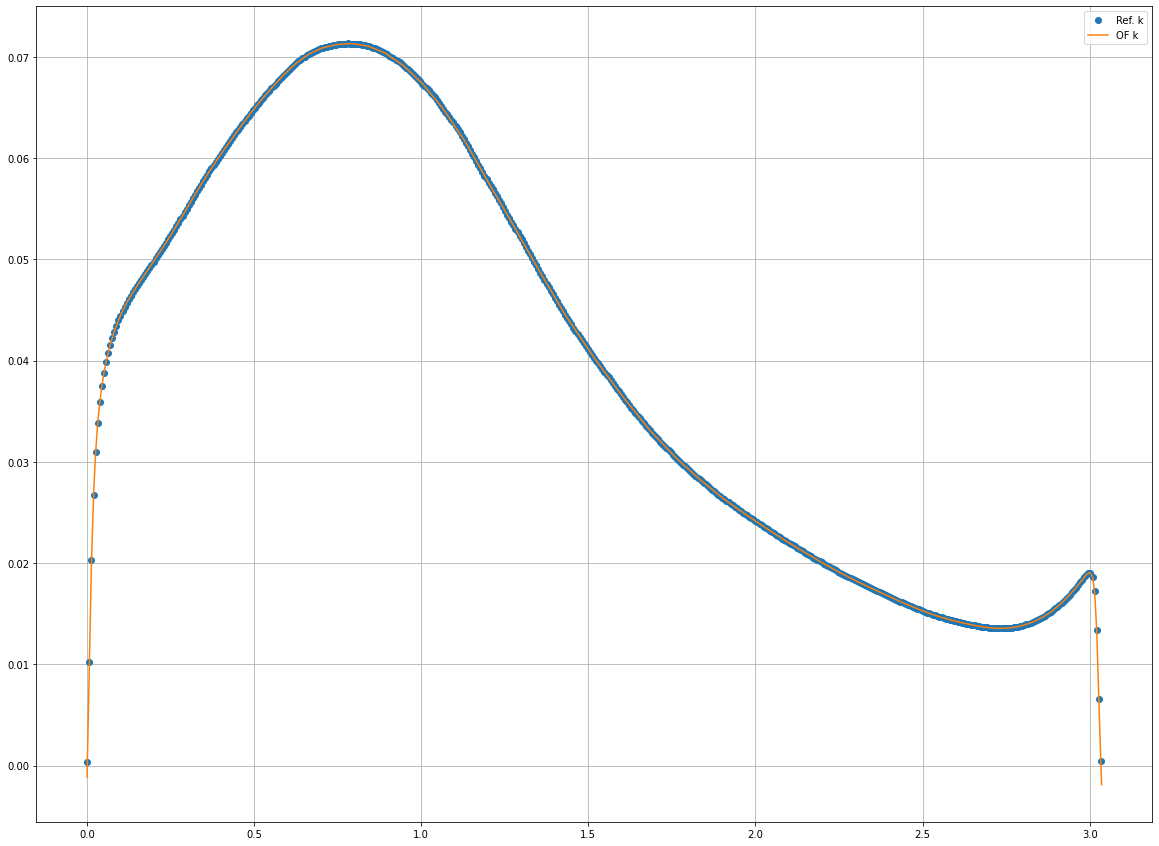

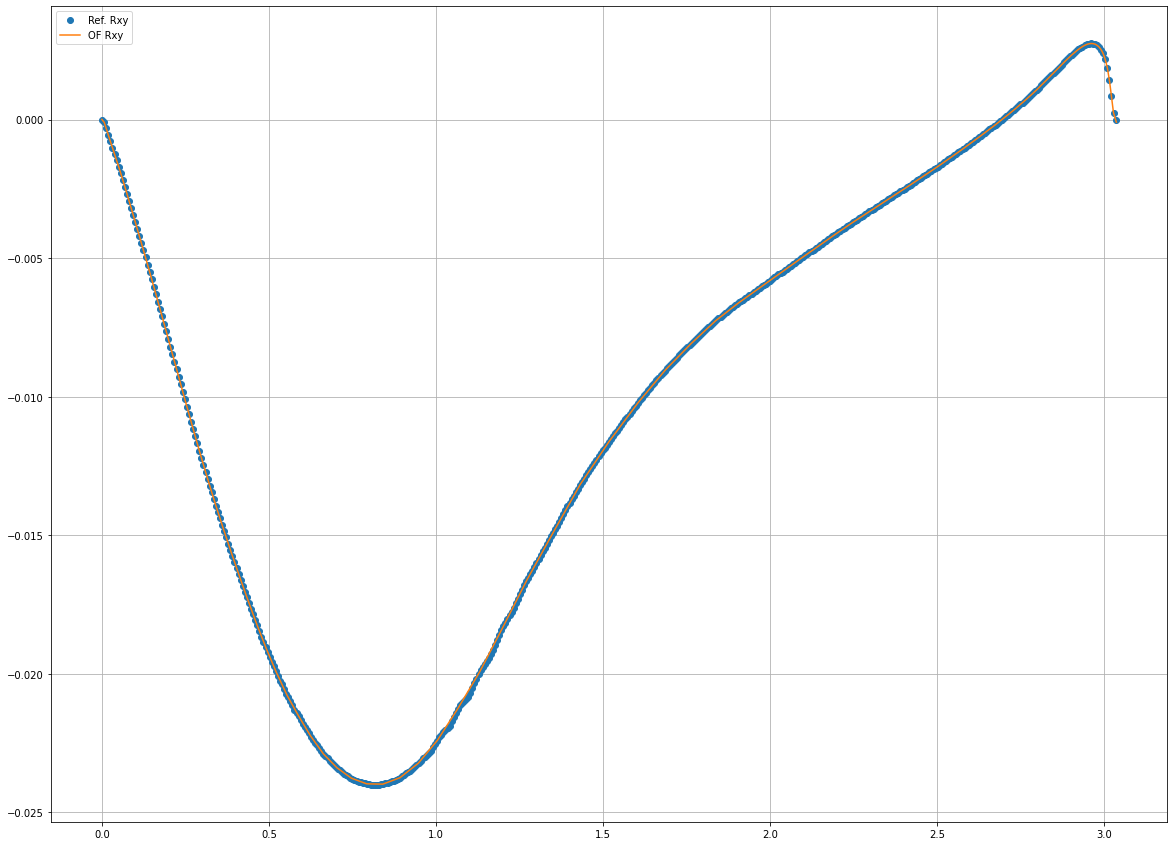

6
(491,)
(163,)


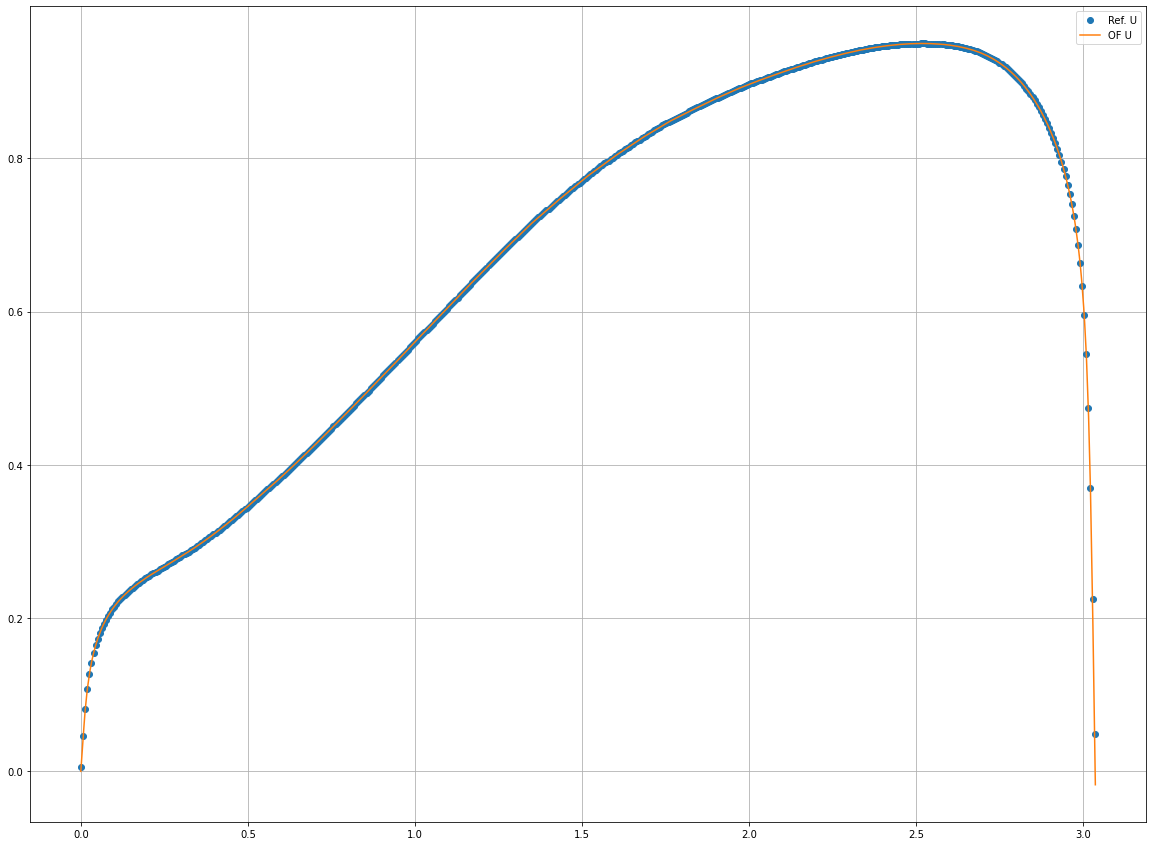

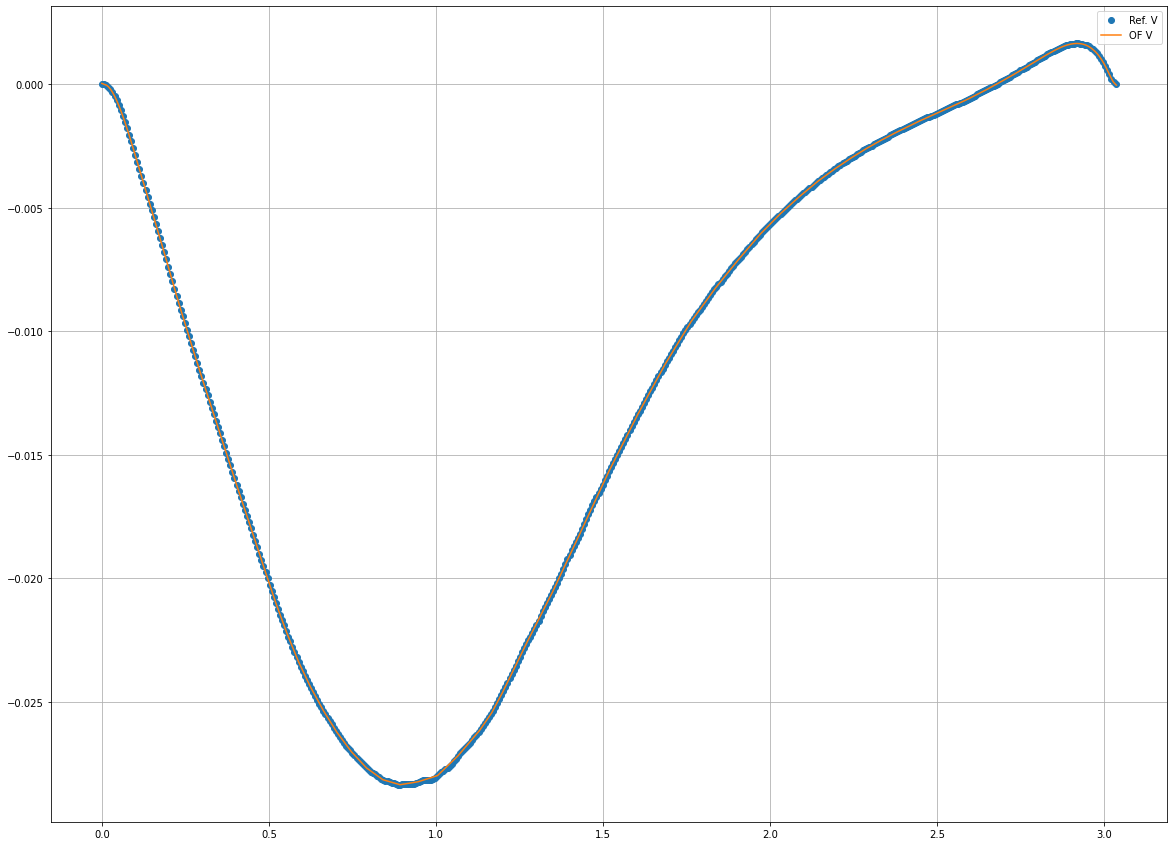

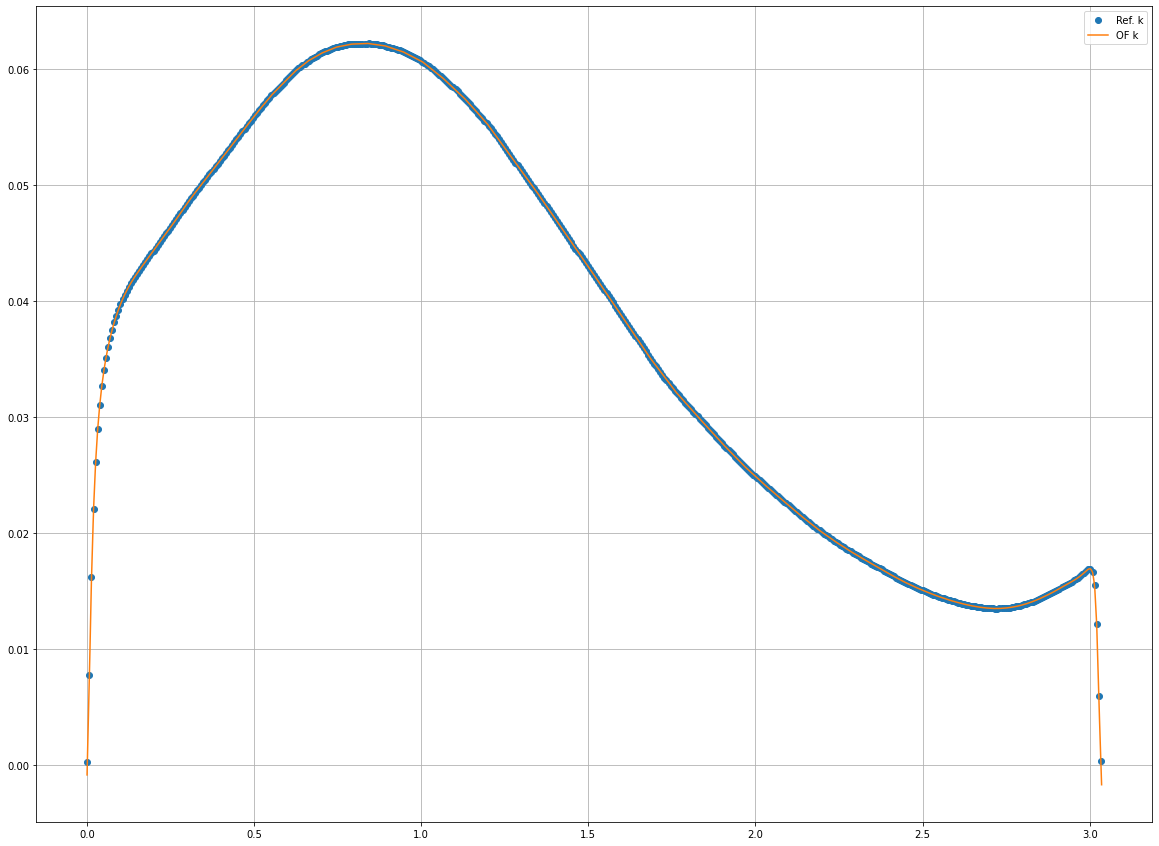

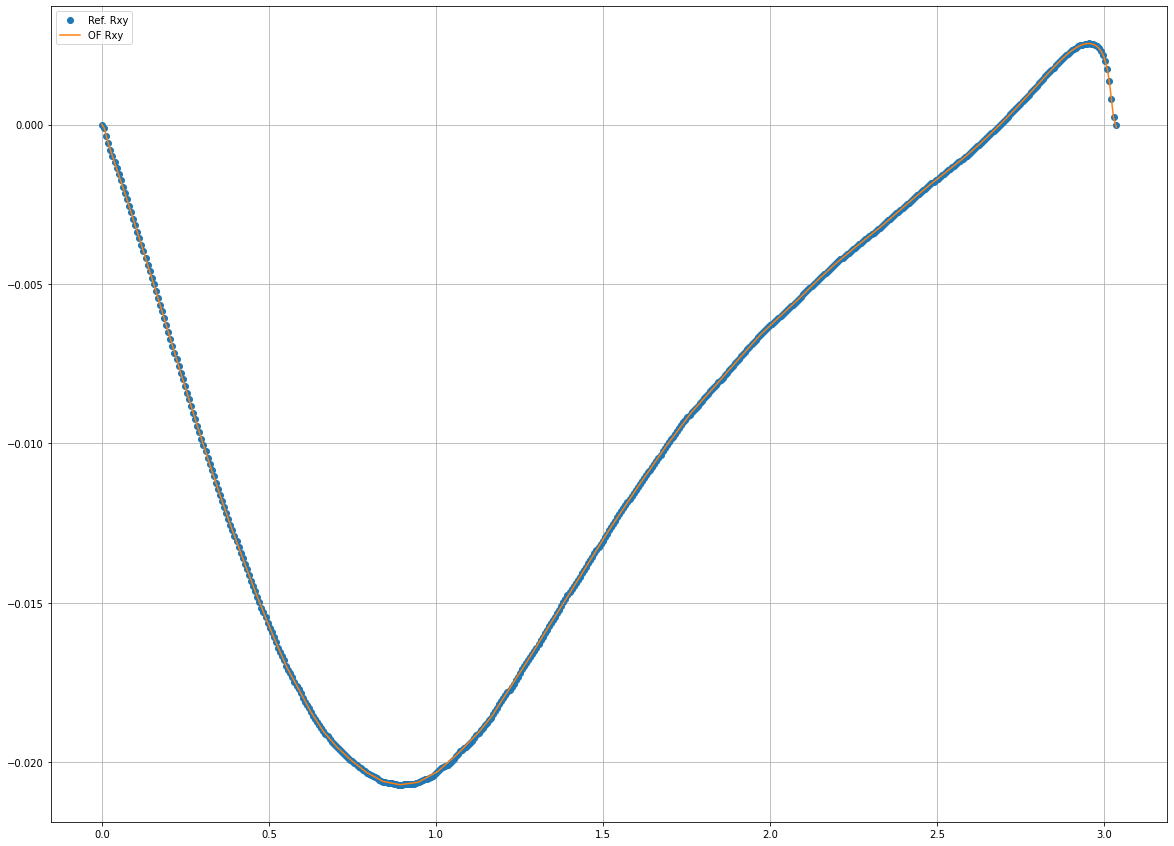

7
(491,)
(164,)


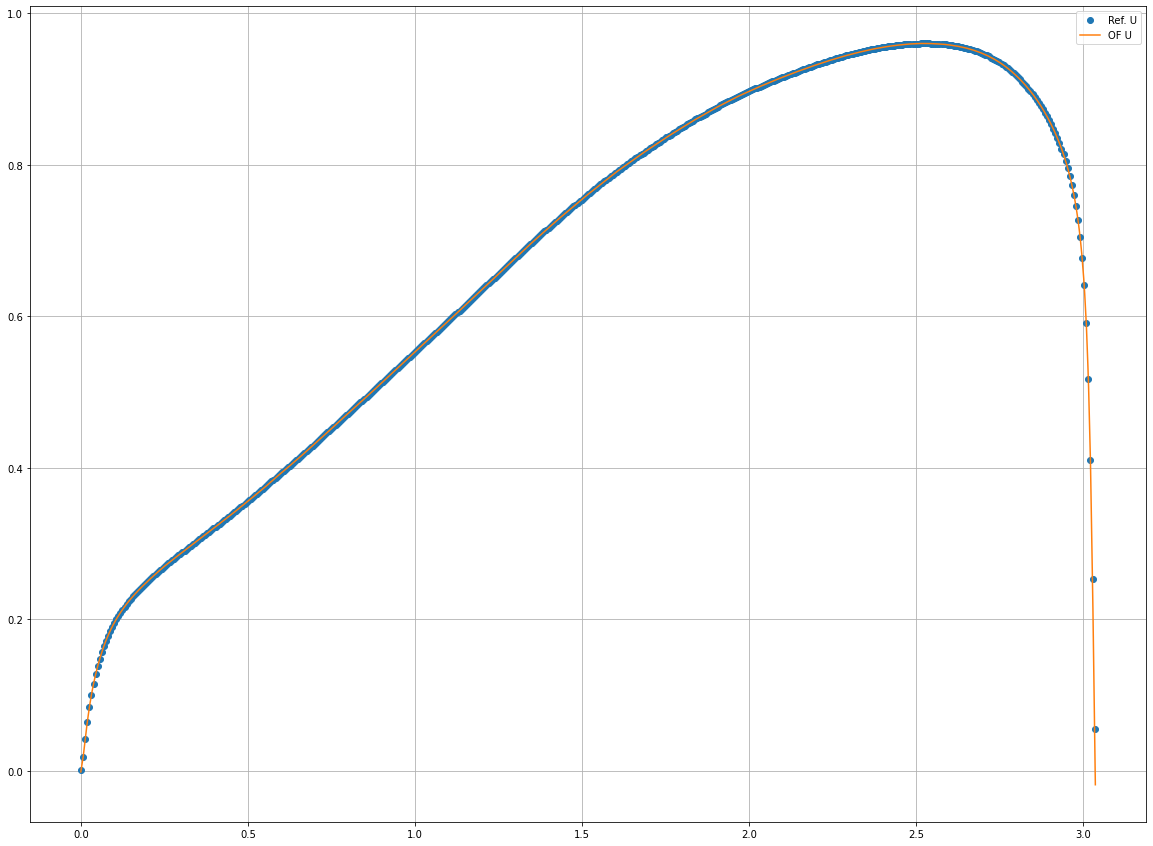

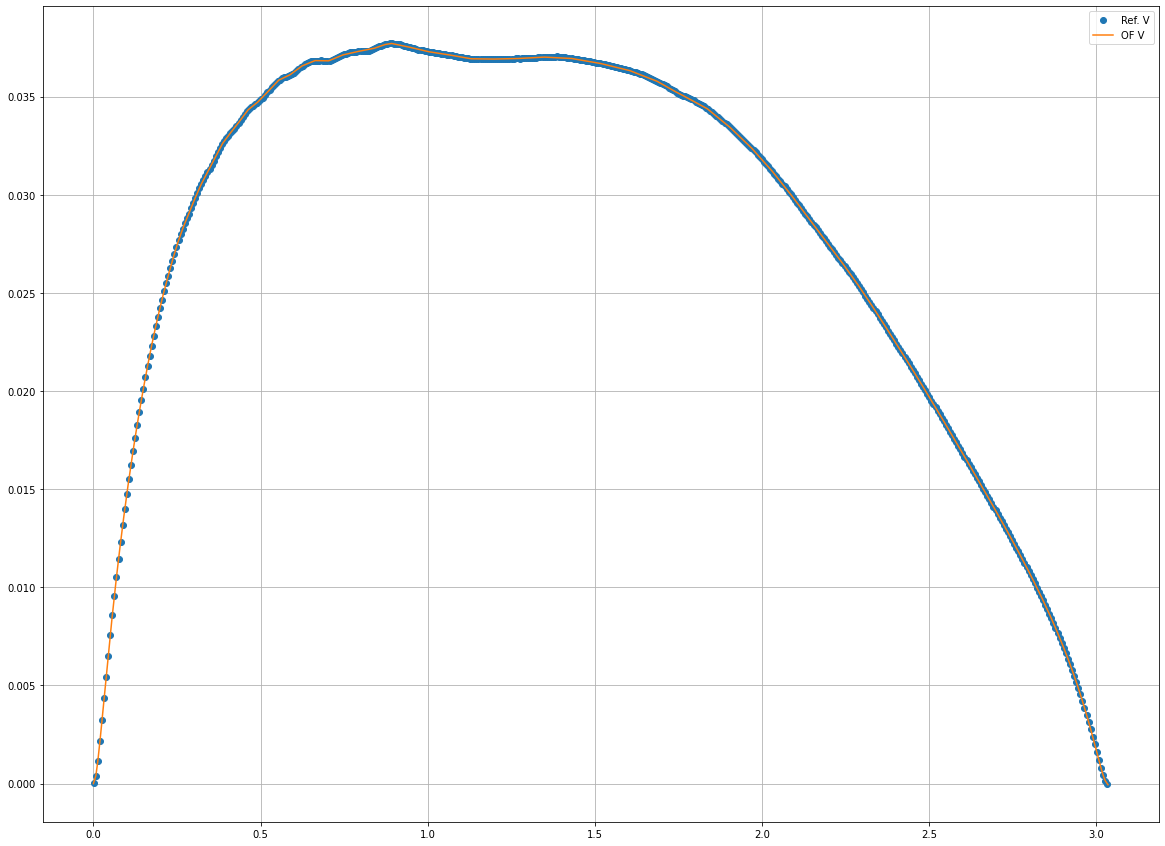

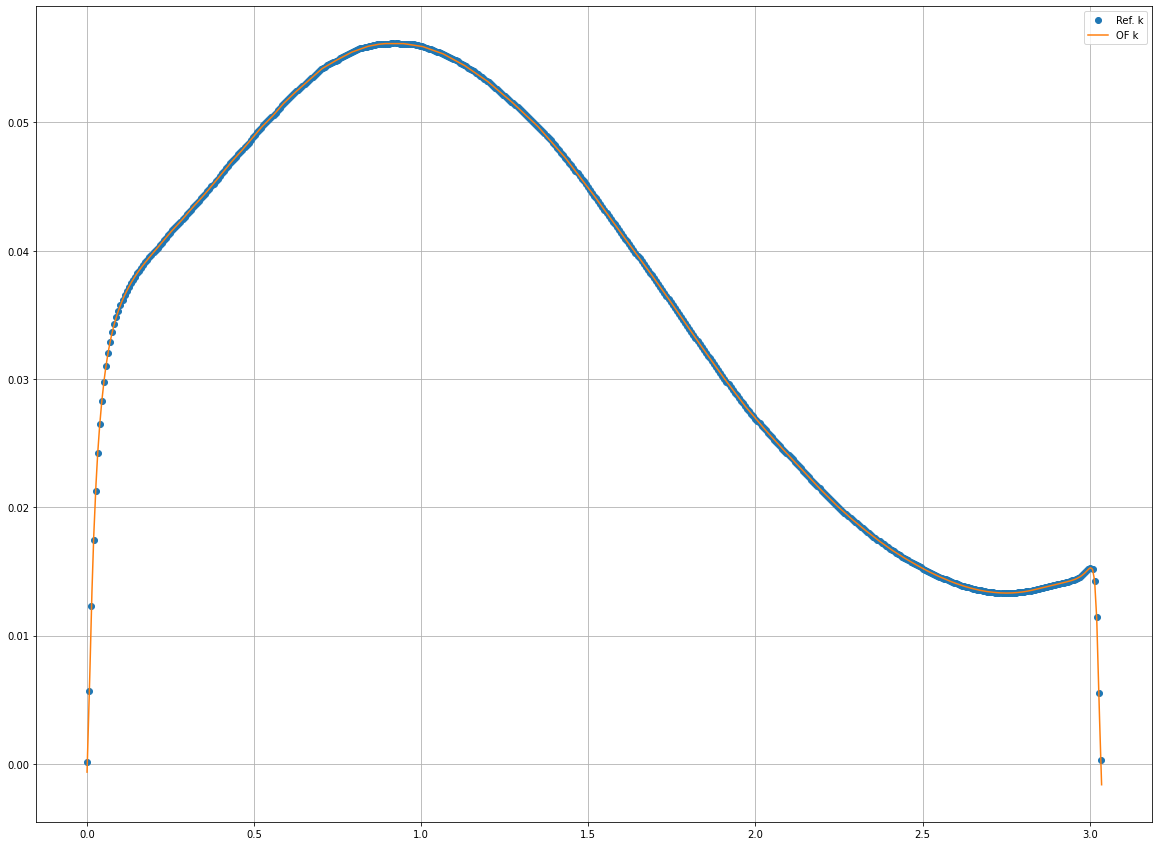

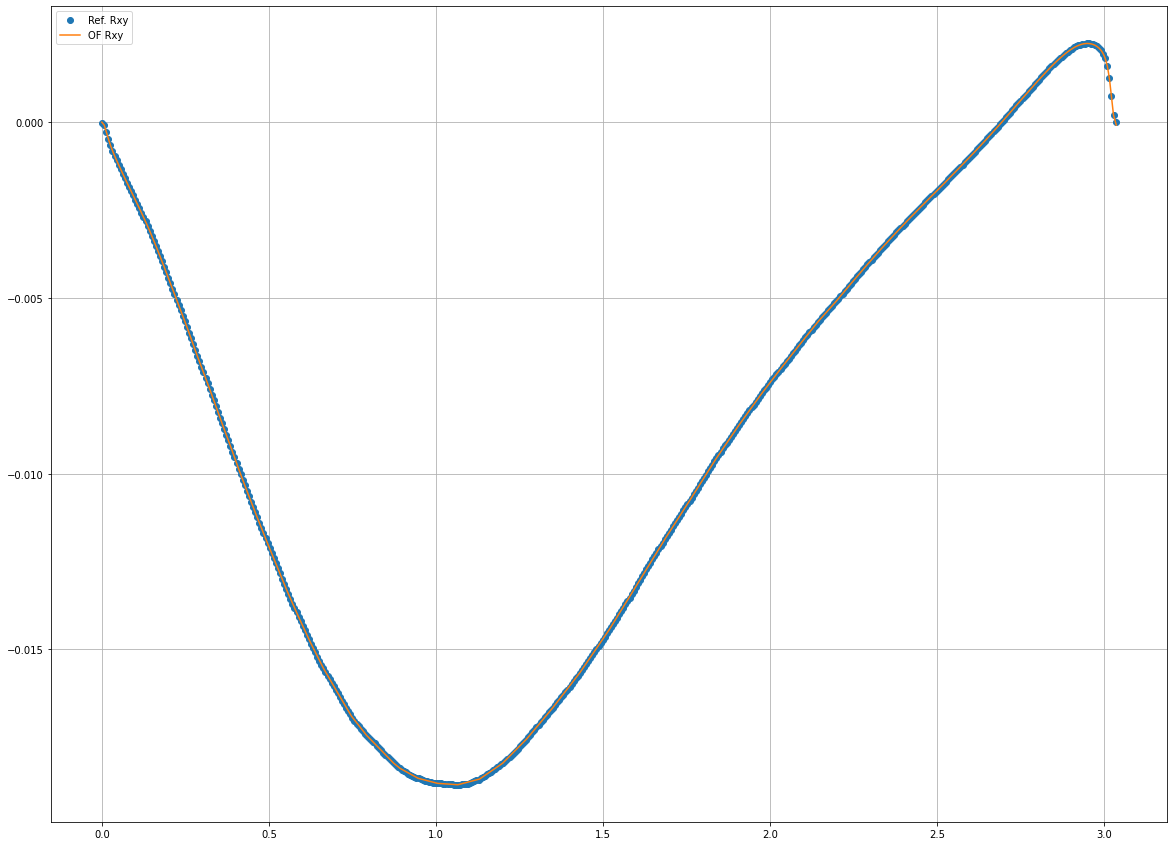

8
(418,)
(163,)


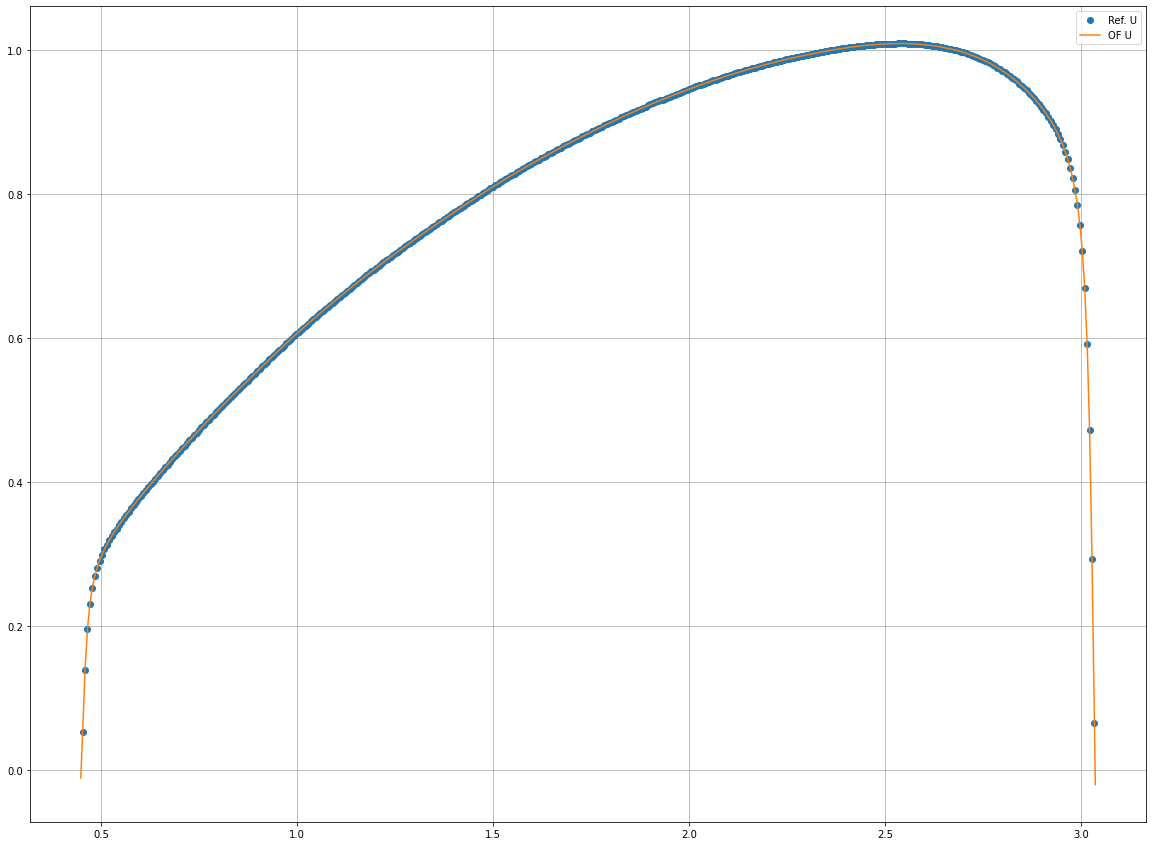

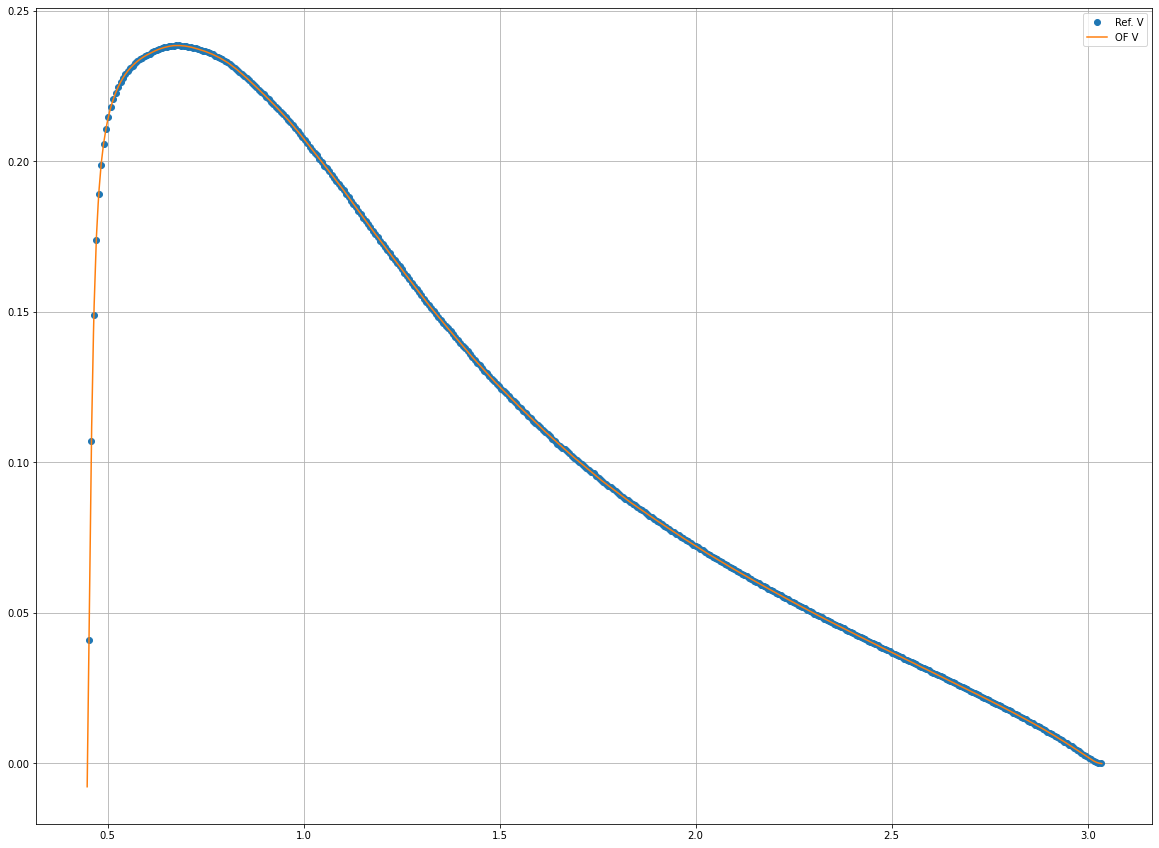

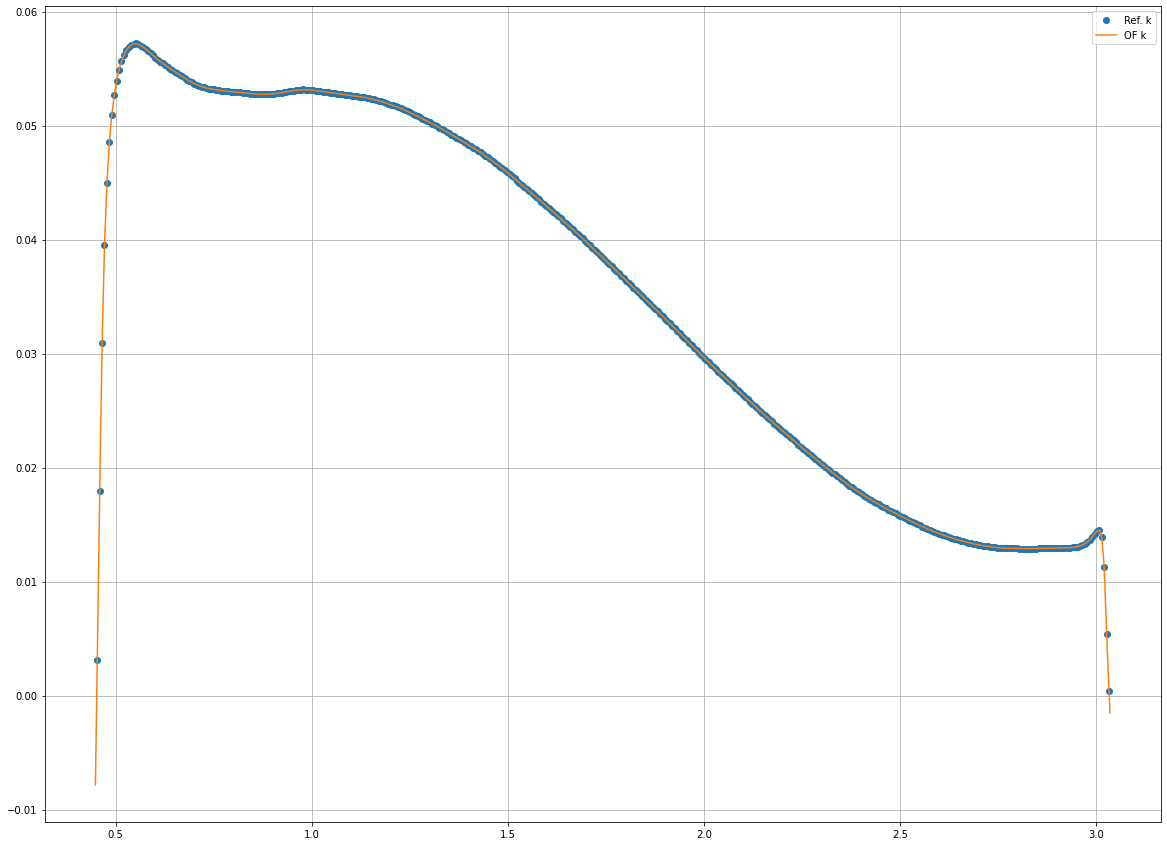

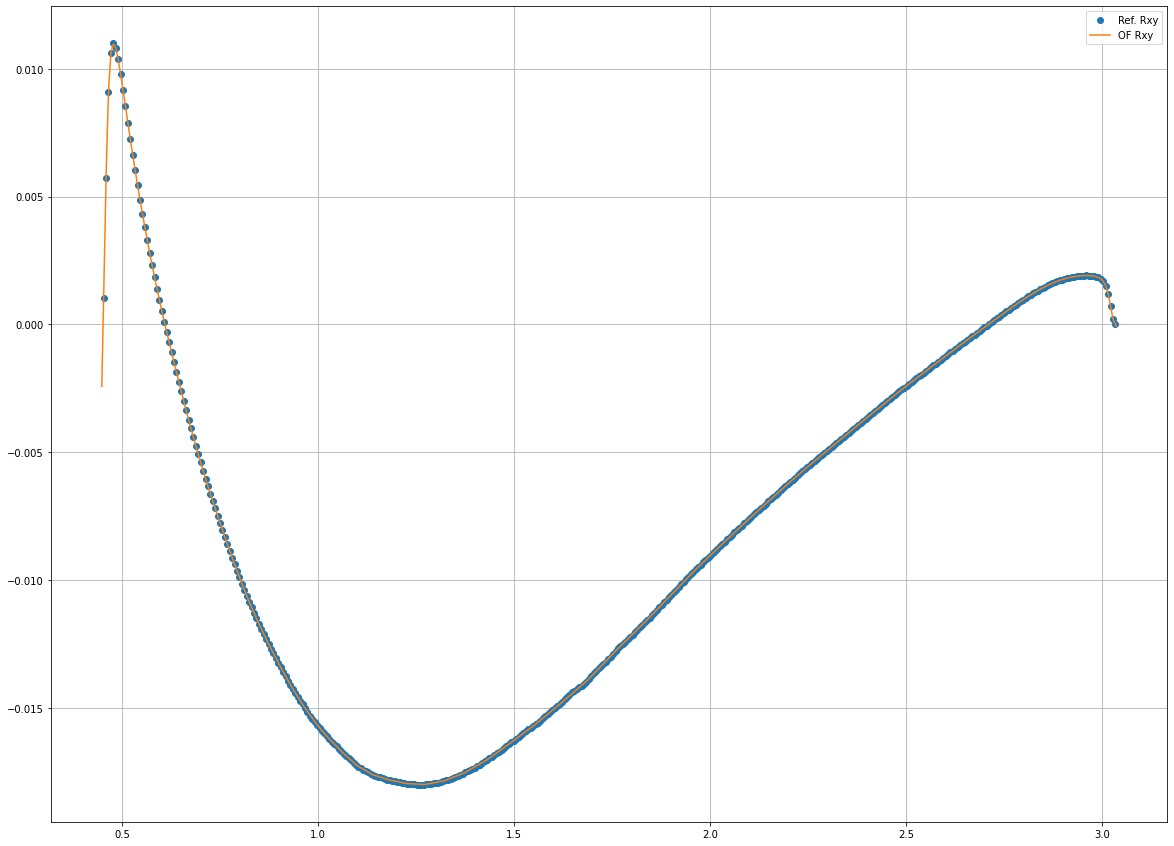

In [11]:
for i in range(9):
    print(i)
    pRef  = Ref[i]
    pRefy = pRef[:,0]
    pRefU = pRef[:,1]
    pRefV = pRef[:,2]
    pRefRxy = pRef[:,5]
    pRefk = pRef[:,6]
    pOF   = OF[i]
    pOFy  = pOF['y']
    
    print(pRefy.shape)
    print(pOFy.shape)
    
    fU = interpolate.interp1d(pRefy, pRefU, kind='linear', fill_value="extrapolate", bounds_error=False)
    fV = interpolate.interp1d(pRefy, pRefV, kind='linear', fill_value="extrapolate", bounds_error=False)
    fk = interpolate.interp1d(pRefy, pRefk, kind='linear', fill_value="extrapolate", bounds_error=False)
    fRxy = interpolate.interp1d(pRefy, pRefRxy, kind='linear', fill_value="extrapolate", bounds_error=False)
    
    pOFU = fU(pOFy)
    pOFV = fV(pOFy)
    pOFk = fk(pOFy)
    pOFRxy = fRxy(pOFy)
    
    plt.figure(figsize=(20,15))
    plt.plot(pRefy, pRefU, 'o', label='Ref. U')
    plt.plot(pOFy, pOFU, '-', label='OF U')
    plt.grid()
    plt.legend()
    plt.show()
    plt.close()
    
    plt.figure(figsize=(20,15))
    plt.plot(pRefy, pRefV, 'o', label='Ref. V')
    plt.plot(pOFy, pOFV, '-', label='OF V')
    plt.grid()
    plt.legend()
    plt.show()
    plt.close()
    
    plt.figure(figsize=(20,15))
    plt.plot(pRefy, pRefk, 'o', label='Ref. k')
    plt.plot(pOFy, pOFk, '-', label='OF k')
    plt.grid()
    plt.legend()
    plt.show()
    plt.close()
    
    plt.figure(figsize=(20,15))
    plt.plot(pRefy, pRefRxy, 'o', label='Ref. Rxy')
    plt.plot(pOFy, pOFRxy, '-', label='OF Rxy')
    plt.grid()
    plt.legend()
    plt.show()
    plt.close()
    
    data_out = np.vstack([pOFy]).T
    file_out = "Y00"+str(i)+".edf"
    np.savetxt(file_out, data_out)
    
    # This is a check for the points order
    #data_out = np.vstack([pOFy, pOFU]).T
    data_out = np.vstack([pOFU]).T
    file_out = "U00"+str(i)+".edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.vstack([pOFV]).T
    file_out = "V00"+str(i)+".edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.vstack([pOFk]).T
    file_out = "K00"+str(i)+".edf"
    np.savetxt(file_out, data_out)
    
    data_out = np.vstack([pOFRxy]).T
    file_out = "Rxy00"+str(i)+".edf"
    np.savetxt(file_out, data_out)

In [7]:
!cat U000.edf U001.edf U002.edf U003.edf U004.edf U005.edf U006.edf U007.edf U008.edf > U0.edf
!cat V000.edf V001.edf V002.edf V003.edf V004.edf V005.edf V006.edf V007.edf V008.edf > V0.edf
!cat K000.edf K001.edf K002.edf K003.edf K004.edf K005.edf K006.edf K007.edf K008.edf > K0.edf
!cat Rxy000.edf Rxy001.edf Rxy002.edf Rxy003.edf Rxy004.edf Rxy005.edf Rxy006.edf Rxy007.edf Rxy008.edf > Rxy0.edf

In [8]:
#!cat U000.edf U008.edf > U0.edf
#!cat V000.edf V008.edf > V0.edf
#!cat K000.edf K008.edf > K0.edf
#!cat Rxy000.edf Rxy008.edf > Rxy0.edf

In [9]:
!gzip -f *.edf

In [10]:
# Interpolate bottom wall points
# This is done because the current point density is too low and reference Cf profile is not well represented
# in the leading and trailing regions

# interpolate OF points
f = interpolate.interp1d(hillOF[:,0], hillOF[:,1], kind='linear', fill_value="extrapolate", bounds_error=False)

# as the ref. data contains only [x/h, Cf] corresponding y/h have to be found
xnew = Cf_Ref[:,0]
ynew = f(xnew)

print(xnew,ynew,ynew.shape)

plt.plot(hill[:,0], hill[:,1], 'o', xnew, ynew, '-')
plt.show()
plt.close()

# This new set of point should be used to sample Cf (wallShearStress) in OF
znew = np.zeros(xnew.shape)
xyz = np.vstack((xnew, ynew, znew))
np.savetxt('x_y_z_Cf.H', xyz.T)

[0.0257766 0.0955427 0.123149  0.151137  0.20796   0.236304  0.250666
 0.265002  0.307326  0.363494  0.433396  0.531369  0.671584  0.797791
 0.994392  1.19105   1.33154   1.52805   1.6823    1.8226    1.86473
 1.92098   2.01948   2.08992   2.18839   2.27274   2.37115   2.51158
 2.69409   2.89047   3.0589    3.25525   3.39549   3.64782   3.85813
 4.06847   4.25082   4.40498   4.69      4.82574   5.12031   5.41486
 5.72352   6.00423   6.38315   6.56566   6.77635   6.93084   7.01519
 7.05738   7.11355   7.19768   7.30979   7.49195   7.6459    7.77172
 7.91153   8.05136   8.19098   8.23229   8.31568   8.35713   8.37032
 8.45297   8.47968   8.52058   8.53334   8.60256   8.64562   8.7035
 8.73349   8.76339   8.77922   8.8091    8.8669    8.90961   8.90985  ] [1.01731879 1.00104004 0.99459857 0.98806803 0.97480933 0.96819573
 0.9648446  0.96149953 0.95162393 0.93851807 0.9032832  0.8249048
 0.7127328  0.6117672  0.4544864  0.30352833 0.20317867 0.09837333
 0.04354    0.01548    0.007054   0. 

NameError: name 'hill' is not defined

In [ ]:
# Cf interpolation
fCf = interpolate.interp1d(Cf_Ref[:,0], Cf_Ref[:,1], kind='nearest', fill_value="extrapolate", bounds_error=False)

#xnew = hillOF[:,0]
#xnew = BottomWallPoints['x']
xnew = newBottomWallPoints['x']
Cfnew = fCf(xnew)

print(Cf_Ref[:,0], Cf_Ref[:,1], Cf_Ref.shape)
print(xnew,Cfnew, Cfnew.shape)

plt.figure(figsize=(20,15))
plt.plot(Cf_Ref[:,0], Cf_Ref[:,1], 'o', label='Ref.')
plt.plot(xnew, Cfnew, '-', label='OF interp.')
plt.grid()
plt.legend()
plt.show()
plt.close()

data_out = np.vstack([Cfnew]).T
file_out = "CF0.edf"
np.savetxt(file_out, data_out)

In [ ]:
!gzip -f CF0.edf